<a href="https://colab.research.google.com/github/BiancaBenelli/Pokemon_project/blob/main/Pokemon_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pokemon

Dataset from https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

Pokedex Data:

- pokedex_number: The entry number of the Pokemon in the National Pokedex
- name: The English name of the Pokemon
- german_name: The German name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- status: Denotes if the Pokemon is normal, sub-legendary, legendary or mythical
- species: The Categorie of the Pokemon
- type_number: Number of types that the Pokemon has
- type_1: The Primary Type of the Pokemon
- type_2: The Secondary Type of the Pokemon if it has it
- height_m: Height of the Pokemon in meters
- weight_kg: The Weight of the Pokemon in kilograms
- ability_1: The Primary Ability of the Pokemon
- ability_2: The Secondary Ability of the Pokemon if it has it
- ability_hidden: Name of the hidden ability of the Pokemon if it has one

Base stats:
- total_points: Total number of Base Points
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon

Training:
- catch_rate: Catch Rate of the Pokemon
- base_friendship: The Base Friendship of the Pokemon
- base_experience: The Base experience of a wild Pokemon when caught
- growth_rate: The Growth Rate of the Pokemon

Breeding:
- egg_type_number: Number of groups where a Pokemon can hatch
- egg_type_?: Names of the egg groups where a Pokemon can hatch
- percentage_male: The percentage of the species that are male. Blank if the - - Pokemon is genderless.
- egg_cycles: The number of cycles (255-257 steps) required to hatch an egg of the Pokemon

Type defenses:
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# Read the csv and create a dataframe
pokemon_df = pd.read_csv('/content/pokemon.csv')

# Exploratory Data Analysis

In [3]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


I have quite a few null values in several columns.
Most columns are numerical (as I expected)

In [4]:
pokemon_df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
pokemon_df.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,1044,898,Calyrex Shadow Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


In [6]:
pokemon_df.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,522.000000,440.769378,4.098565,1.529187,1.374067,71.216571,2.268900,439.353110,70.067943,80.476555,...,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,301.809819,262.517231,2.272788,0.499386,3.353349,132.259911,0.803154,121.992897,26.671411,32.432728,...,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,261.000000,212.000000,2.000000,1.000000,0.600000,9.000000,2.000000,330.000000,50.000000,55.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,522.000000,436.000000,4.000000,2.000000,1.000000,29.500000,2.000000,458.000000,68.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,6.000000,2.000000,1.600000,70.500000,3.000000,515.000000,82.000000,100.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1044.000000,898.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [7]:
pokemon_df.shape

(1045, 51)

## Cleaning up the dataset

Some columns are unnecessary: I drop them

In [8]:
# I don't need the japanese or german name of the Pokemon, the english one is enough
# I also delete the Unnamed: 0 column because I already have an index
# I drop growth_rate since I don't care about it
pokemon_df.drop(['Unnamed: 0', 'german_name', 'japanese_name', 'growth_rate'], axis=1, inplace=True)
pokemon_df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male',
       'egg_cycles', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

In [9]:
# I drop the columns about eggs, since they won't be the focus of this project
pokemon_df.drop(['egg_type_number', 'egg_type_1', 'egg_type_2', 'egg_cycles'], axis=1, inplace=True)
pokemon_df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'percentage_male', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

## Null values

In [10]:
# Find exactly how many missing values I have in each column
pokemon_df.isnull().sum()

pokedex_number        0
name                  0
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              492
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           529
ability_hidden      232
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate           18
base_friendship     115
base_experience     120
percentage_male     173
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug           0
against_rock          0
against_ghost         0
against_dragon        0
against_dark          0
against_steel   

In [11]:
# A list of the columns with null values 
pokemon_df.columns[pokemon_df.isnull().any()]

# This confirms what pokemon_df.info() already told me, but with a compact visualization

Index(['type_2', 'weight_kg', 'ability_1', 'ability_2', 'ability_hidden',
       'catch_rate', 'base_friendship', 'base_experience', 'percentage_male'],
      dtype='object')

In [12]:
# I shouldn't have any null values in ability_1, so I check which rows are null
pokemon_df[pokemon_df['ability_1'].isnull()]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
33,25,Partner Pikachu,1,Normal,Mouse Pokémon,1,Electric,NaN,0.4,6.0,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
172,133,Partner Eevee,1,Normal,Evolution Pokémon,1,Normal,NaN,0.3,6.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1033,890,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [13]:
# Partner Pokémon refers to the special Pikachu or Eevee the player starts with in "Pokémon: Let's Go, Pikachu!"" and
#"Let's Go, Eevee!". I drop those 2 rows, since there already are the normal Pikachu and Eevee

# For the pokemon Eternatus Eternamax	the dataset is missing values in more than one columns. Since Eternatus Eternamax is just
#a powered-up form of Eternatus incountered once in the whole game, I drop it and keep only Eternatus.

# -> I drop those 3 rows
pokemon_df = pokemon_df[pokemon_df['ability_1'].notna()]

In [14]:
# Check if it worked
pokemon_df[pokemon_df['ability_1'].isnull()]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy


In [15]:
# Go on to the next columns
pokemon_df.columns[pokemon_df.isnull().any()]

Index(['type_2', 'ability_2', 'ability_hidden', 'catch_rate',
       'base_friendship', 'base_experience', 'percentage_male'],
      dtype='object')

In [16]:
# About the columns type_2 and ability_2: if there is a null value, it means that a Pokemon doesn't have a second
# type/ability, therefore I put the word "None" in place of the null values
pokemon_df['type_2'] = pokemon_df['type_2'].fillna("None")
pokemon_df['ability_2'] = pokemon_df['ability_2'].fillna("None")

# I can do the same for ability_hidden
pokemon_df['ability_hidden'] = pokemon_df['ability_hidden'].fillna("None")

In [17]:
pokemon_df.columns[pokemon_df.isnull().any()]

Index(['catch_rate', 'base_friendship', 'base_experience', 'percentage_male'], dtype='object')

In [18]:
pokemon_df[pokemon_df['catch_rate'].isnull()]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
69,52,Galarian Meowth,1,Normal,Scratch Cat Pokémon,1,Steel,None,0.4,7.5,...,2.0,0.5,0.5,0.5,0.50,1.0,0.5,1.0,0.5,0.5
100,77,Galarian Ponyta,1,Normal,Unique Horn Pokémon,1,Psychic,None,0.8,24.0,...,2.0,1.0,1.0,0.5,2.00,1.0,1.0,1.0,0.5,0.5
102,78,Galarian Rapidash,1,Normal,Unique Horn Pokémon,2,Psychic,Fairy,1.7,80.0,...,2.0,1.0,1.0,0.5,2.00,1.0,1.0,1.0,0.5,0.5
111,83,Galarian Farfetch'd,1,Normal,Wild Duck Pokémon,1,Fighting,None,0.8,42.0,...,1.0,2.0,2.0,0.5,0.50,1.0,1.0,0.5,1.0,2.0
144,110,Galarian Weezing,1,Normal,Poison Gas Pokémon,2,Poison,Fairy,3.0,16.0,...,2.0,1.0,2.0,0.5,1.00,1.0,1.0,1.0,1.0,0.5
158,122,Galarian Mr. Mime,1,Normal,Dancing Pokémon,2,Psychic,Ice,1.4,56.8,...,1.0,1.0,0.5,1.0,1.00,1.5,0.0,1.0,1.5,1.0
273,222,Galarian Corsola,2,Normal,Coral Pokémon,1,Ghost,None,0.6,0.5,...,1.0,1.0,1.0,0.5,1.00,2.0,1.0,2.0,1.0,1.0
320,263,Galarian Zigzagoon,3,Normal,Tiny Raccoon Pokémon,2,Dark,Normal,0.4,17.5,...,1.0,1.0,0.0,2.0,1.00,0.0,1.0,0.5,1.0,2.0
322,264,Galarian Linoone,3,Normal,Rushing Pokémon,2,Dark,Normal,0.5,32.5,...,1.0,1.0,0.0,2.0,1.00,0.0,1.0,0.5,1.0,2.0
654,554,Galarian Darumaka,5,Normal,Zen Charm Pokémon,1,Ice,None,0.7,40.0,...,1.0,1.0,1.0,1.0,2.00,1.0,1.0,1.0,2.0,1.0


In [19]:
# I deal with the null values for the 2 Legendary pokemon by creating a mask to find all of legendary pokemon in the dataset
legendary_mask = pokemon_df[pokemon_df['status'] == 'Legendary']

In [20]:
# I use the above mask to compute the mean of the catch_rate for legendaries
legendary_catch_rate_mean = round(legendary_mask.catch_rate.mean(), 1)
# I round it up so it's even with the other floats of the column

In [21]:
# How I could have done the same as above, but with groupby instead of mask 
status_groupby = pokemon_df.groupby('status')
status_groupby.catch_rate.mean()

status
Legendary         23.923077
Mythical           9.500000
Normal           103.432852
Sub Legendary     10.854545
Name: catch_rate, dtype: float64

In [22]:
# Now I have a the value to put in place of the Nan
# I create another mask for Legendary pokemon with null values at catch_rate
legendary_and_null_catch_mask =  (pokemon_df['status'] == 'Legendary') & (pokemon_df['catch_rate'] != pokemon_df['catch_rate'])
# I replace the null values with the mean I computed above using loc
pokemon_df.loc[legendary_and_null_catch_mask, 'catch_rate'] = pokemon_df.loc[legendary_and_null_catch_mask, 'catch_rate'].fillna(legendary_catch_rate_mean)

In [23]:
# Galarian Form Pokemon are Regional Variants of Pokemon previously discovered in other regions,
# so I chose to drop those rows and only keep the "original" pokemons
# Morpeko Hangry Mode	is just another form of Morpeko, so I drop it too
pokemon_df = pokemon_df[pokemon_df['catch_rate'].notna()]

In [24]:
pokemon_df[pokemon_df['catch_rate'].isnull()]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy


In [25]:
pokemon_df.columns[pokemon_df.isnull().any()]

Index(['base_friendship', 'base_experience', 'percentage_male'], dtype='object')

In [26]:
# For percentage_male I wanted to fill the null values with "Genderless"
# pokemon_df['percentage_male'] = pokemon_df['percentage_male'].fillna("Genderless")

# If I did this, the column percentage_male would become mixed (float + string), which is not good
# -> I drop it
pokemon_df.drop(['percentage_male'], axis=1, inplace=True)

In [27]:
pokemon_df.columns[pokemon_df.isnull().any()]

Index(['base_friendship', 'base_experience'], dtype='object')

In [28]:
# For base_friendship and base_experience I use a for loop to apply the same logic used for catch_rate
status_list = pokemon_df['status'].value_counts().index
null_column_name = pokemon_df.columns[pokemon_df.isnull().any()]
for j in null_column_name:
  for i in status_list:
    # A mask to select the status to work on
    status_mask =  pokemon_df[pokemon_df['status'] == i]
    # With the above mask, compute the mean of the wanted values
    status_base_mean = round(status_mask[j].mean(), 1)

    # Another mask, this time for the status wanted + the rows with null values
    status_and_null_mask =  (pokemon_df['status'] == i) & (pokemon_df[j] != pokemon_df[j])

    # Updated the null values of the above mask witth the mean
    pokemon_df.loc[status_and_null_mask, j] = pokemon_df.loc[status_and_null_mask, j].fillna(status_base_mean)

In [29]:
pokemon_df.columns[pokemon_df.isnull().any()]

Index([], dtype='object')

In [30]:
# Since I dropped some rows, I reset the indexed of the dataset
pokemon_df.reset_index(drop = True, inplace = True)

I don't have any more null values, I can study the database

# Plots

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

## How many Pokemon per generation?

In [32]:
# To search how many Pokemon I have per generation, I simply use value_counts()
pokemon_per_generation = pokemon_df['generation'].value_counts()
pokemon_per_generation

1    184
5    166
3    163
4    121
2    106
8    103
7     99
6     85
Name: generation, dtype: int64

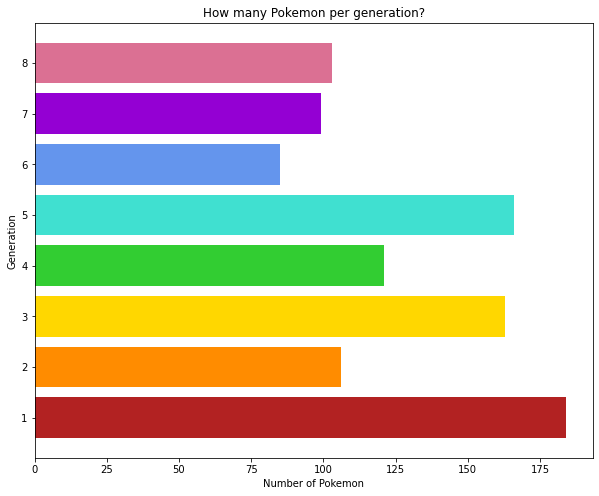

In [33]:
plt.figure(figsize = (10, 8))
plt.title('How many Pokemon per generation?')
# I use horizontal bars
plt.barh(pokemon_per_generation.index, pokemon_per_generation.values, label = pokemon_per_generation.index, color = ['firebrick', 'turquoise', 'gold', 'limegreen', 'darkorange', 'palevioletred', 'darkviolet', 'cornflowerblue'])
plt.xlabel('Number of Pokemon')
plt.ylabel('Generation')
plt.show()

## Pokemon statuses per generation?
I study how in each generation the different statuses of Pokemon are distributed by status

In [34]:
status_list = pokemon_df['status'].value_counts().index
status_list

Index(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype='object')

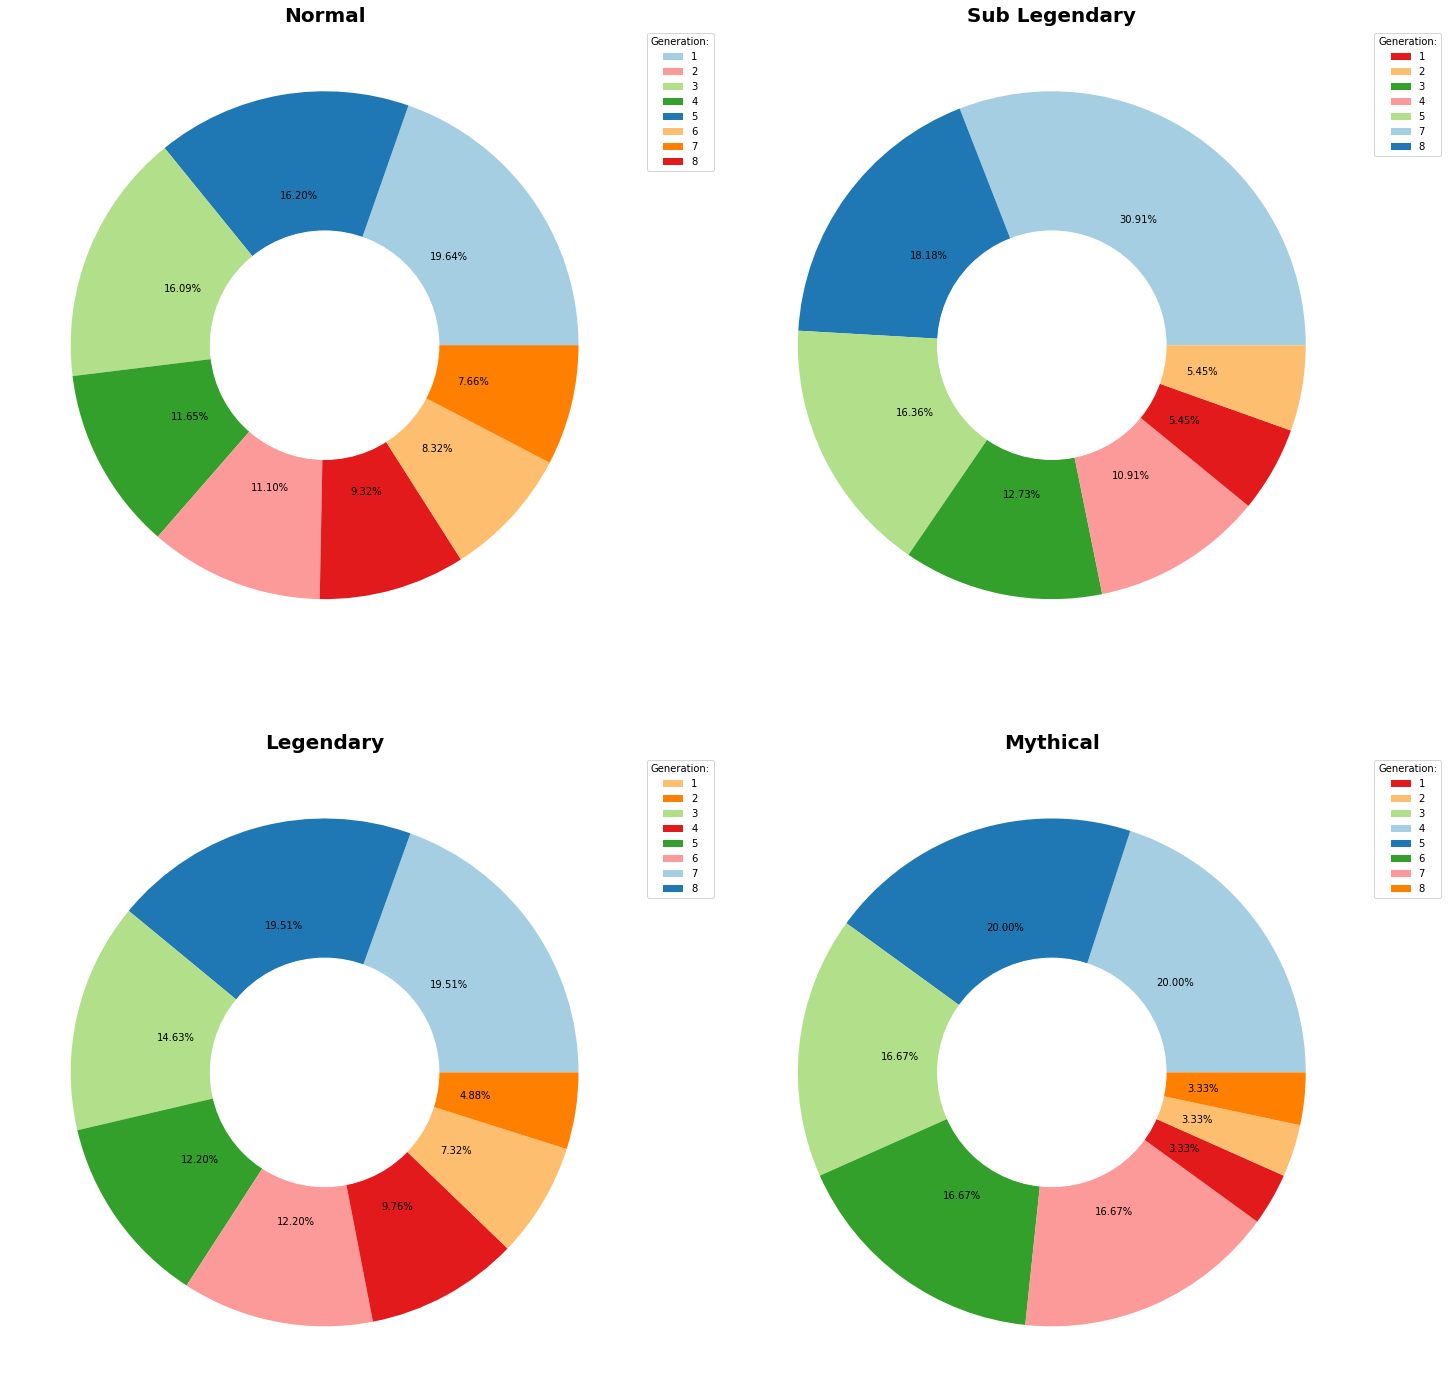

In [35]:
# I use donut plots and subplots, "drawing" with a for loop
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20), constrained_layout = True) # constrained_layout = True is to avoid overlap
for i, ax in zip(range(len(status_list)), axs.flat):
  # Firstly I select a status to study -> for it I will see how many Pokemon I have in each generation
  status_mask = pokemon_df[pokemon_df['status'] == status_list[i]]
  # To count how many times each status appears
  status_per_gen = status_mask['generation'].value_counts()
  # Create a circle at the center of the plot -> how I go from pie chart to donut chart
  donut_circle = plt.Circle( (0,0), 0.45, color = 'white')
  # For the colors I use a Seabron palette
  ax.pie(status_per_gen.values, labels = status_per_gen.index, autopct='%.2f%%',
         colors = sb.color_palette("Paired", len(status_per_gen.index)),  labeldistance=None)
  ax.add_artist(donut_circle)
  # To sort the legend numerically
  handles, labels = ax.get_legend_handles_labels()
  handles, labels = zip(*[ (handles[i], labels[i]) for i in sorted(range(len(handles)), key=lambda k: list(map(int,labels))[k])] )
  ax.legend(handles, labels, title = 'Generation:', bbox_to_anchor=(1, 1))
  ax.set_title(status_list[i], fontsize = 20, fontweight='bold')
plt.show()  

### Other plots I could have used

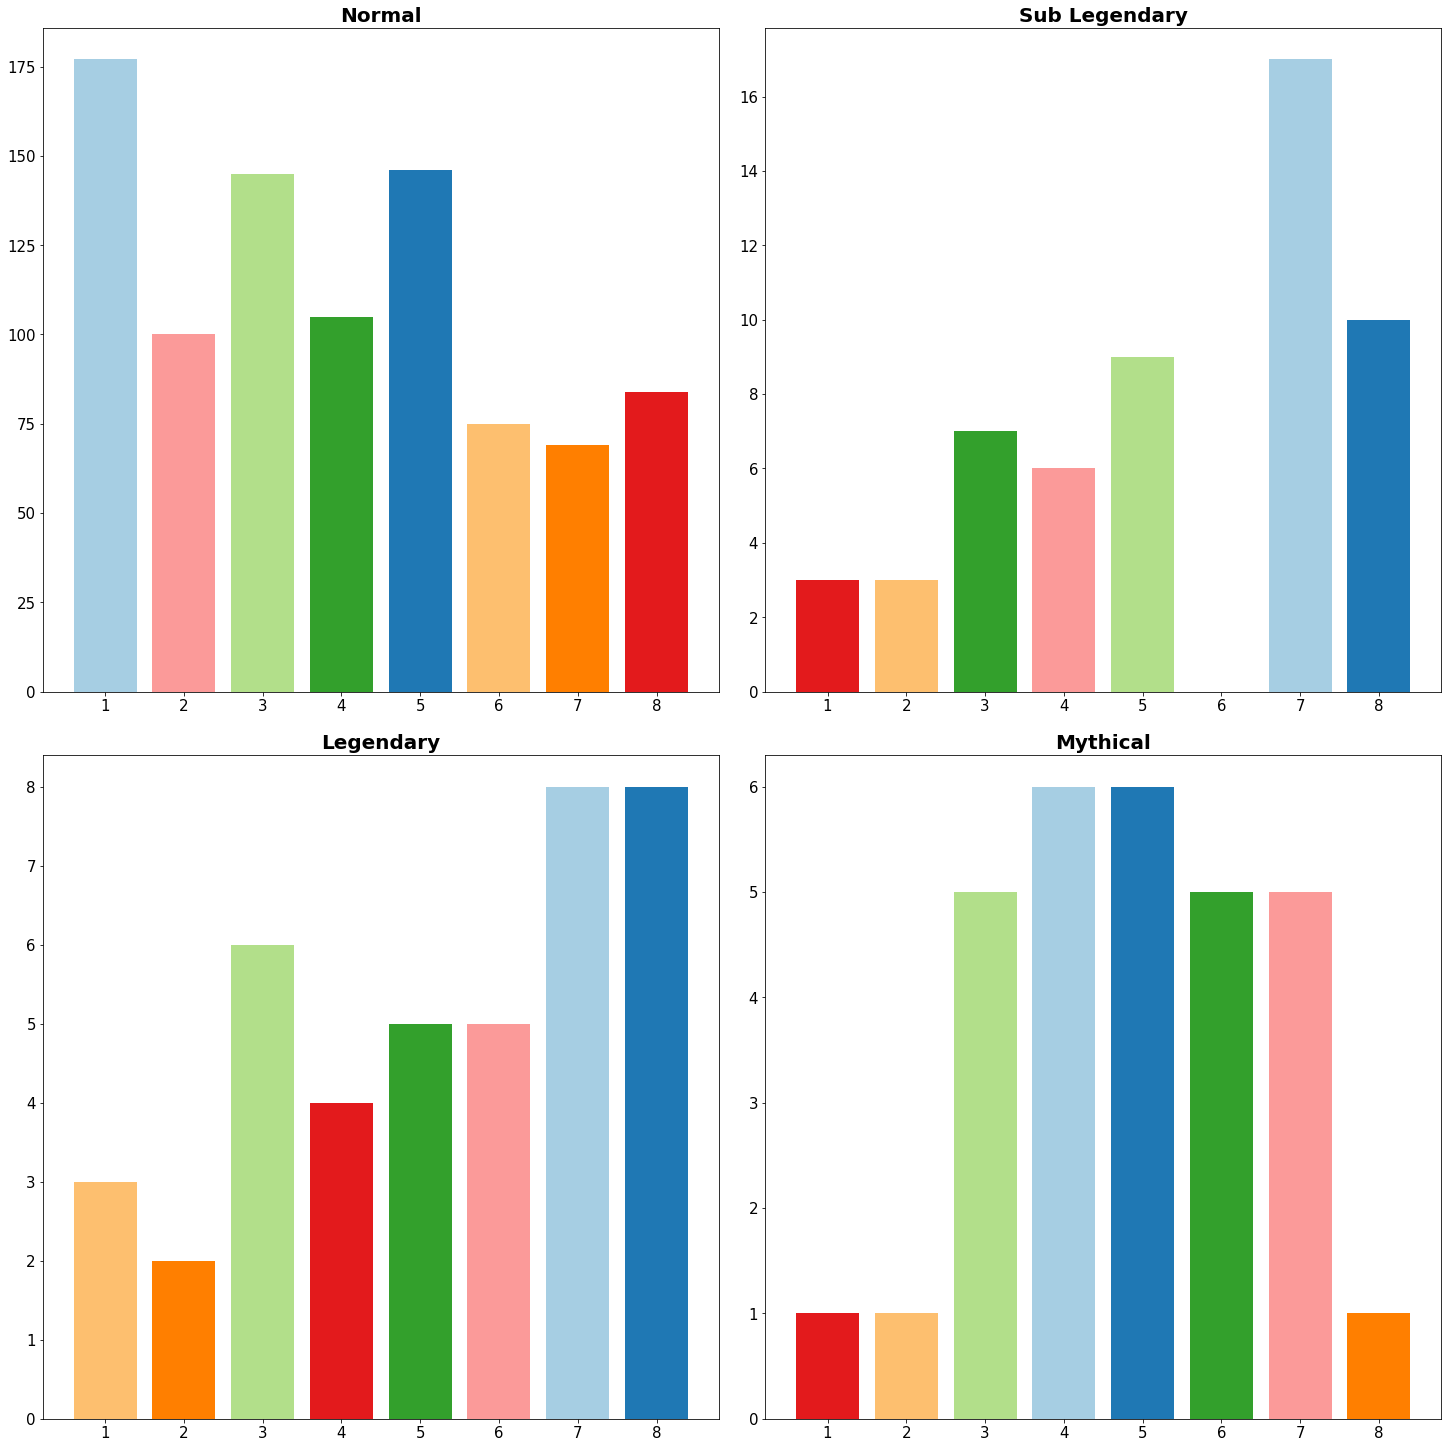

In [36]:
# With a barchart
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20), constrained_layout = True)
for i, ax in zip(range(len(status_list)), axs.flat):
  # Firstly I select a status to study -> for it I will see how many I have in each generation
  status_mask = pokemon_df[pokemon_df['status'] == status_list[i]]
  # To count how many times each type appears
  status_per_gen = status_mask['generation'].value_counts()
  # To draw the subplot
  ax.bar(status_per_gen.index, status_per_gen.values, label = status_list[i], color = sb.color_palette("Paired", len(status_per_gen.index)))
  # I upped the labelsize of the ticks to make them more readable
  ax.tick_params(axis = 'both', labelsize = 15)
  # To add a title
  ax.set_title(status_list[i], fontsize = 20, fontweight='bold')
plt.show()

The problem with this bar chart is that the y axes are of such different legths that if I kept the same ratio for all subplots, some would become unreadable

In [37]:
status_df = pokemon_df[['generation', 'status']]
status_groupby = pokemon_df.groupby('status')
status_groupby.sum()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
status,,,,,,,,,,,,,,,,,,,,,
Legendary,25500,216,71,174.8,15363.1,49,27238,4391,5119,4280,...,43.0,41.50,33.50,42.75,46.25,61.5,51.5,58.00,41.50,54.50
Mythical,17530,145,47,38.2,2587.9,30,17840,2507,3257,2810,...,36.5,34.50,23.75,41.00,29.00,38.0,25.0,38.00,30.25,33.50
Normal,378863,3567,1364,995.5,46911.0,2184,374205,60029,68507,64380,...,971.5,1066.25,893.00,894.75,1128.75,885.5,872.5,946.50,881.75,964.50
Sub Legendary,32671,298,88,111.5,8893.8,72,31709,4936,5669,5172,...,53.0,62.25,54.50,48.50,67.25,62.5,55.0,58.75,54.75,68.75


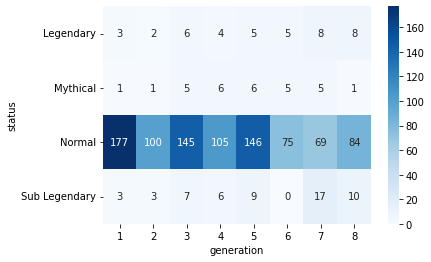

In [38]:
status_per_gen = pokemon_df.groupby(['status', 'generation']).size().unstack(fill_value = 0)
sb.heatmap(status_per_gen, annot= True, cmap="Blues", fmt="d")

The heatmap is not a great graph due to the big ranges in values -> I drop the Normal status and focus on the "special" ones

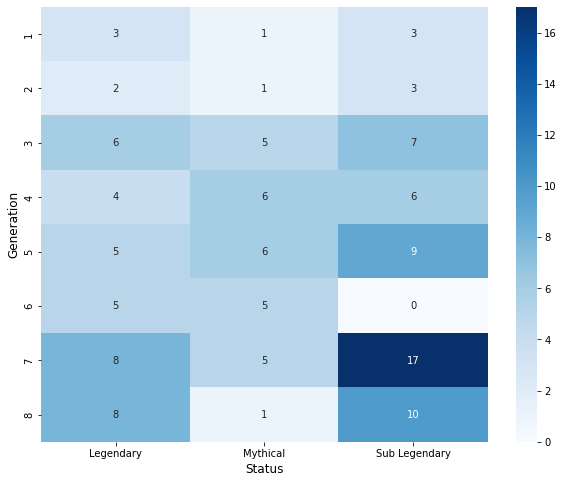

In [39]:
special_mask = pokemon_df[pokemon_df['status'] != 'Normal']
status_per_gen = special_mask.groupby(['generation', 'status']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 8))
sb.heatmap(status_per_gen, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Status', fontsize = 12)
plt.ylabel('Generation', fontsize = 12)
plt.show()

## Type 1 frequency

In [40]:
# To search how many Pokemon I have for each Type 1, I simply use value_counts()
type_1_frequency = pokemon_df['type_1'].value_counts()
type_1_frequency

Water       134
Normal      114
Grass        91
Bug          81
Psychic      78
Fire         65
Electric     60
Rock         60
Dark         44
Dragon       41
Fighting     41
Ghost        41
Poison       39
Ground       39
Steel        35
Ice          34
Fairy        22
Flying        8
Name: type_1, dtype: int64

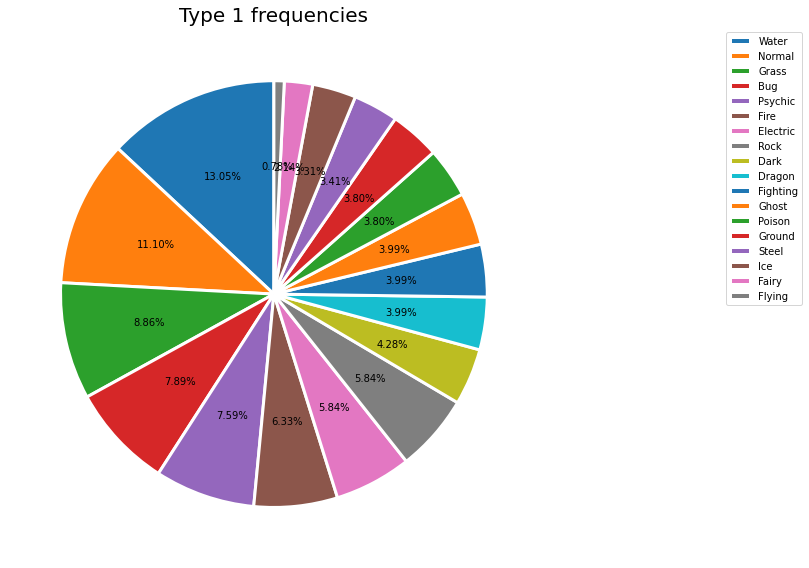

In [41]:
# I could use a pie chart
plt.figure(figsize=(10, 8))
# I make the title bigger so it is more readable
plt.title("Type 1 frequencies", fontdict = {'fontsize' : 20})
plt.pie(type_1_frequency, labels=type_1_frequency.index, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },  labeldistance=None)
# I move the legend, otherwise it overlaps with the chart
plt.legend(bbox_to_anchor=(1.5, 1))
plt.tight_layout()
plt.show()

I don't think the pie chart is the best way to show this data, so I try another

In [42]:
!pip install squarify -q

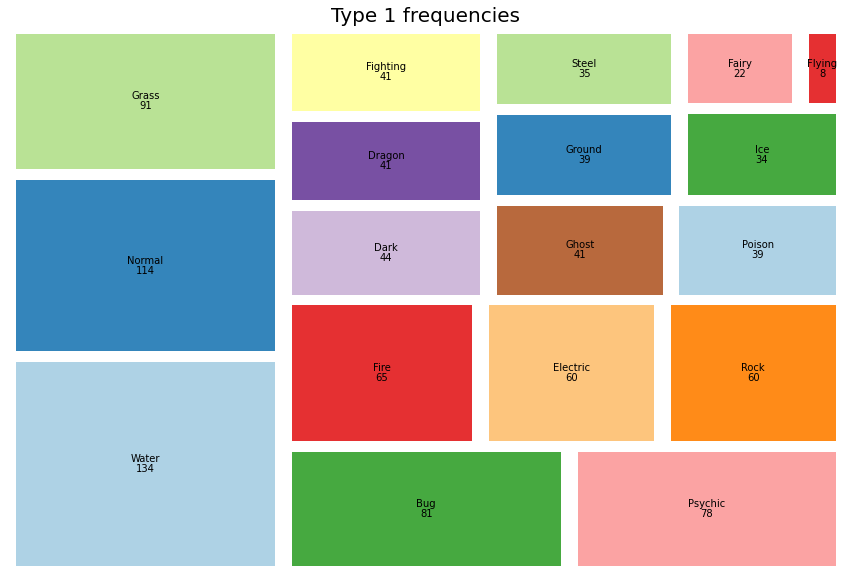

In [43]:
import squarify

plt.figure(figsize = (15, 10))
plt.title("Type 1 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = type_1_frequency.values, label = type_1_frequency.index, value = type_1_frequency.values,
              alpha=0.9, color=sb.color_palette("Paired"), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

Water Type is the most frequent, followed by Normal and Grass Types

The least frequent are Flying and Fairy

## Type 2 frequency

In [44]:
# First of all, I only want the Pokemon who have a Type 2 -> I use a boolean mask to get those Pokemon who
# don't have 'None' as value for Type 2
type_2_present_mask = pokemon_df[pokemon_df['type_2'] != 'None']
type_2_present_mask

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,892,Urshifu Rapid Strike Style,8,Sub Legendary,Wushu Pokémon,2,Fighting,Water,1.9,105.0,...,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.5,0.5,2.0
1019,893,Zarude,8,Mythical,Rogue Monkey Pokémon,2,Dark,Grass,1.8,70.0,...,0.5,2.0,0.0,4.00,1.0,0.5,1.0,0.5,1.0,2.0
1024,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,0.5,2.0,0.5,4.00,1.0,2.0,1.0,2.0,1.0,1.0
1025,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,1.0,0.5,2.00,2.0,2.0,1.0,2.0,2.0,1.0


In [45]:
# The first len is for how manyy Pokemon don't have a Type 2, the second for these who do
type_df_len = [(len(pokemon_df.index) - len(type_2_present_mask.index)), len(type_2_present_mask.index)]
name = ["Pokemon without a Type 2", "Pokemon with a Type 2"]
# This is for the colors of the plot
colors = ['#B7C3F3', '#8EB897']

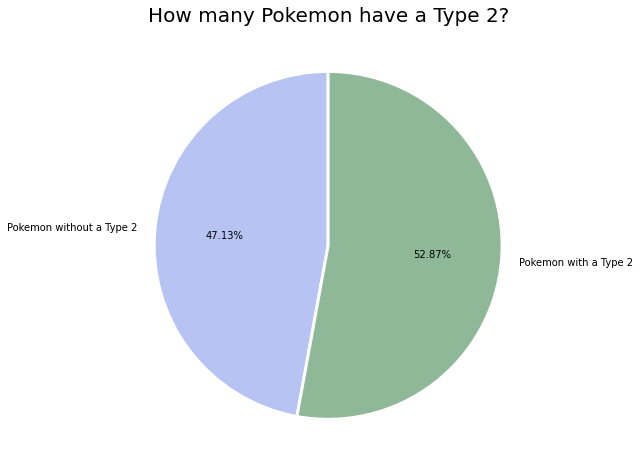

In [46]:
# I use a pie chart
plt.figure(figsize=(10, 8))
# I make the title bigger so it is more readable
plt.title("How many Pokemon have a Type 2?", fontdict = {'fontsize' : 20})
plt.pie(type_df_len, labels = name, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = colors)
#plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

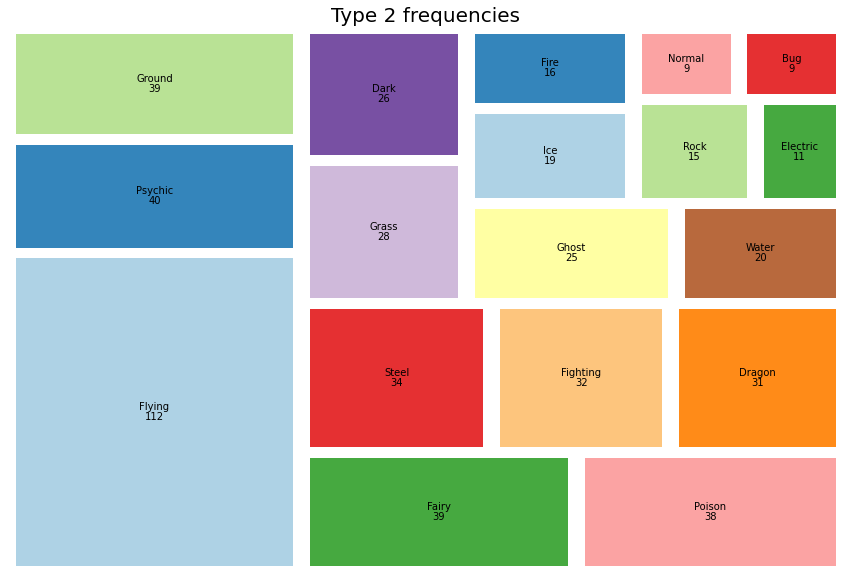

In [47]:
import squarify
type_2_frequency = type_2_present_mask['type_2'].value_counts()

plt.figure(figsize = (15, 10))
plt.title("Type 2 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = type_2_frequency.values, label = type_2_frequency.index, value = type_2_frequency.values,
              alpha = 0.9, color=sb.color_palette("Paired"), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

In [48]:
# I need a list of all the values possible of Types (I used type_1, but type_2 would have yield the same results)
type_list = type_2_present_mask['type_1'].value_counts().index
type_list

Index(['Water', 'Bug', 'Grass', 'Normal', 'Rock', 'Psychic', 'Fire', 'Dark',
       'Dragon', 'Electric', 'Ghost', 'Steel', 'Poison', 'Ground', 'Ice',
       'Fighting', 'Flying', 'Fairy'],
      dtype='object')

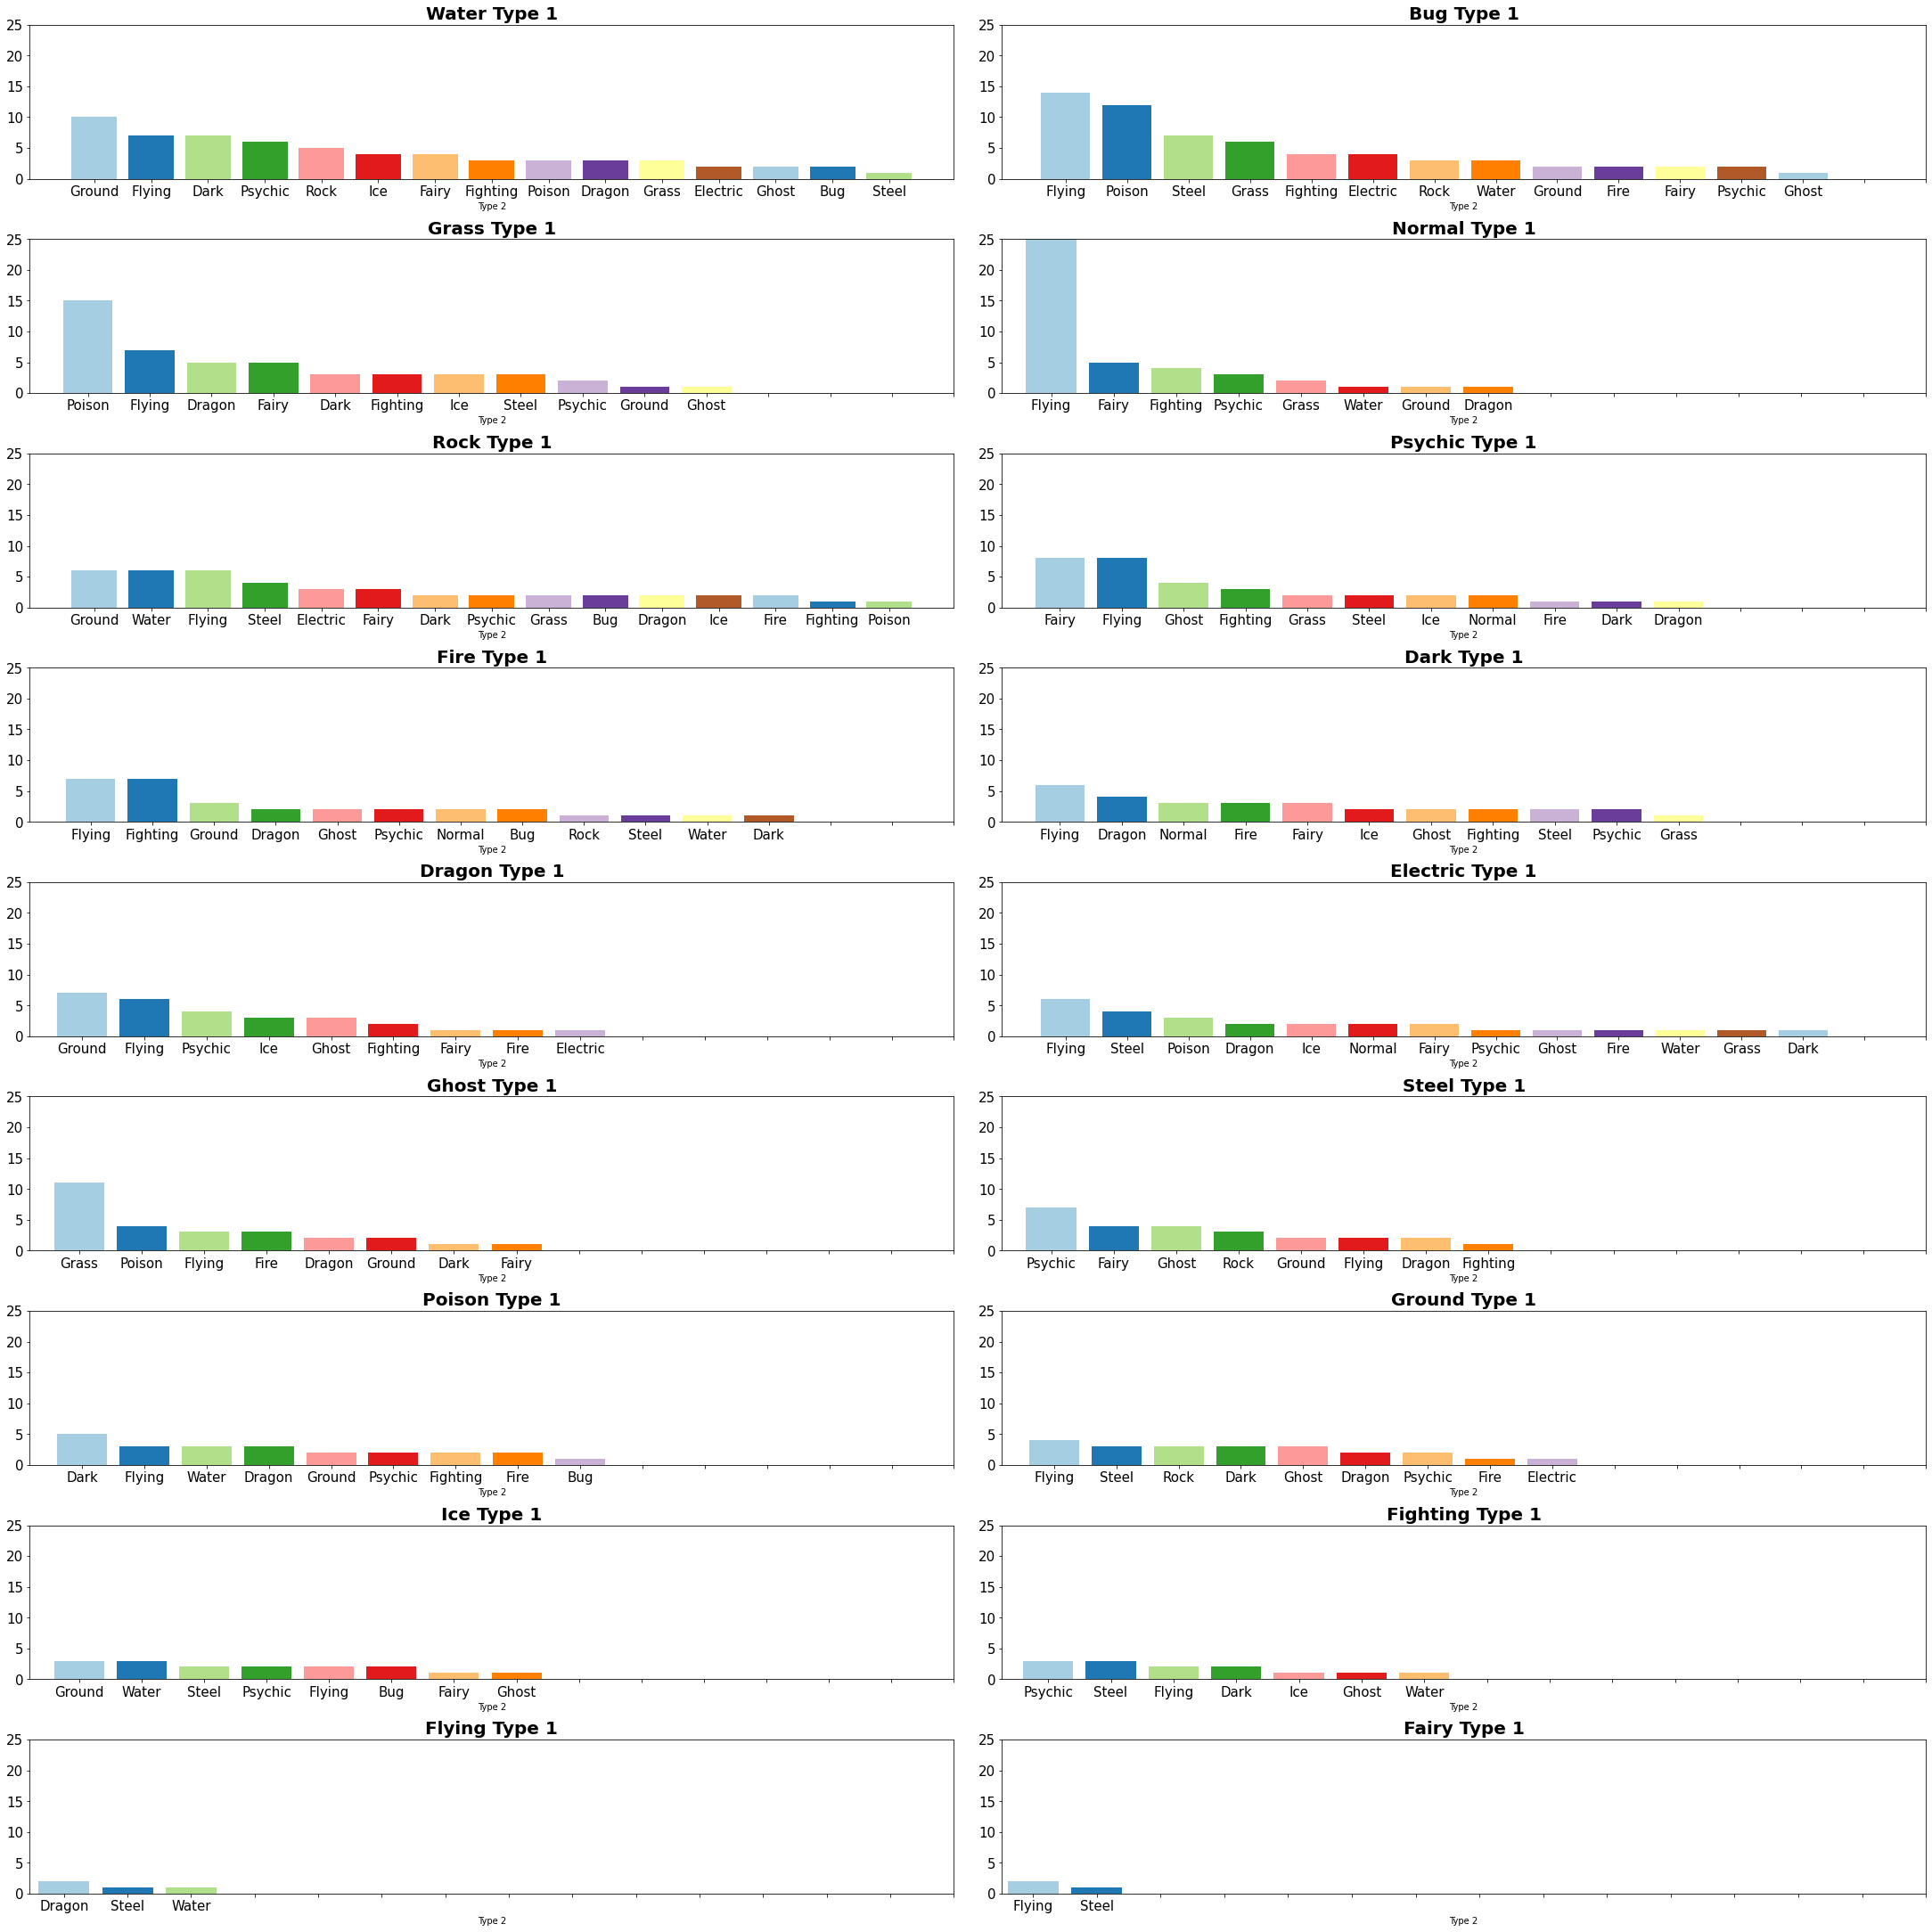

In [49]:
# I used a foor loop to draw a subplot for each Type 1 to see with what frequency that type has associated
# each Type 2 (which can even be 0)

# constrained_layout = True is to make sure the different subplots don't overlap, especially the titles
fig, axs = plt.subplots(nrows = 9, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  # Firstly I select a Type 1 to study -> for it I will see how many Types 2 I have
  type_1 = type_2_present_mask[type_2_present_mask['type_1'] == type_list[i]]
  # To count how many times each Type 2 appears
  type_2_frequency = type_1['type_2'].value_counts()
  # To draw the subplot
  ax.bar(type_2_frequency.index, type_2_frequency.values, label = type_list[i], color = sb.color_palette("Paired", len(type_2_frequency.index)))
  ax.set_xlabel('Type 2', fontsize = 10)
  # I set the limit of the y axis so all the bars are proportional
  ax.set_ylim([0, 25])
  # By setting xticks, all the bars have the same width
  ax.set_xticks(range(15)) 
  # I upped the labelsize of the ticks to make them more readable
  ax.tick_params(axis = 'both', labelsize = 15)
  # To add a title
  ax.set_title(type_list[i] + " Type 1", fontsize = 20, fontweight='bold')
plt.show()

### Other plots I could have used
I used Water as type_1 for those example (the foor loop is a bit slow, so this is faster)

In [50]:
water_type_1 = type_2_present_mask[type_2_present_mask['type_1'] == 'Water']
water_type_1

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
78,62,Poliwrath,1,Normal,Tadpole Pokémon,2,Water,Fighting,1.3,54.0,...,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,0.5,2.0
89,72,Tentacool,1,Normal,Jellyfish Pokémon,2,Water,Poison,0.9,45.5,...,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
90,73,Tentacruel,1,Normal,Jellyfish Pokémon,2,Water,Poison,1.6,55.0,...,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
99,79,Slowpoke,1,Normal,Dopey Pokémon,2,Water,Psychic,1.2,36.0,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,0.5,1.0
101,80,Slowbro,1,Normal,Hermit Crab Pokémon,2,Water,Psychic,1.6,78.5,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,779,Bruxish,7,Normal,Gnash Teeth Pokémon,2,Water,Psychic,0.9,19.0,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,0.5,1.0
905,788,Tapu Fini,7,Sub Legendary,Land Spirit Pokémon,2,Water,Fairy,1.3,21.2,...,1.0,1.0,1.0,0.5,1.0,1.0,0.0,0.5,1.0,1.0
954,834,Drednaw,8,Normal,Bite Pokémon,2,Water,Rock,1.0,115.5,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1005,882,Dracovish,8,Normal,Fossil Pokémon,2,Water,Dragon,2.3,215.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,2.0


In [51]:
type_1_water_frequency = water_type_1['type_2'].value_counts()
type_1_water_frequency

Ground      10
Flying       7
Dark         7
Psychic      6
Rock         5
Ice          4
Fairy        4
Fighting     3
Poison       3
Dragon       3
Grass        3
Electric     2
Ghost        2
Bug          2
Steel        1
Name: type_2, dtype: int64

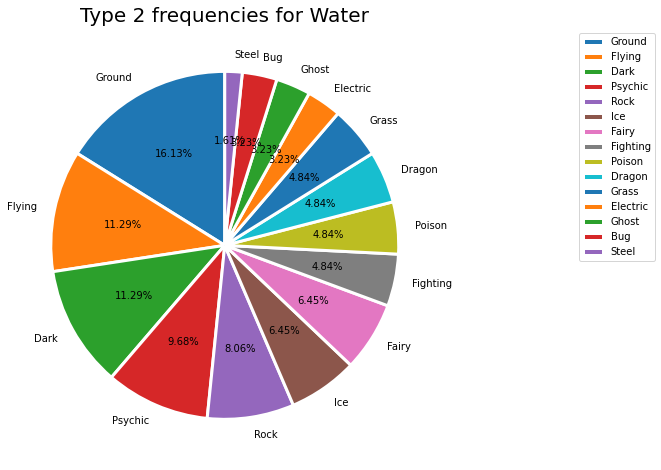

In [52]:
# I use a pie chart
plt.figure(figsize=(10, 8))
# I make the title bigger so it is more readable
plt.title("Type 2 frequencies for Water", fontdict = {'fontsize' : 20})
plt.pie(type_1_water_frequency.values, labels = type_1_water_frequency.index, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

In [53]:
!pip install pywaffle -q

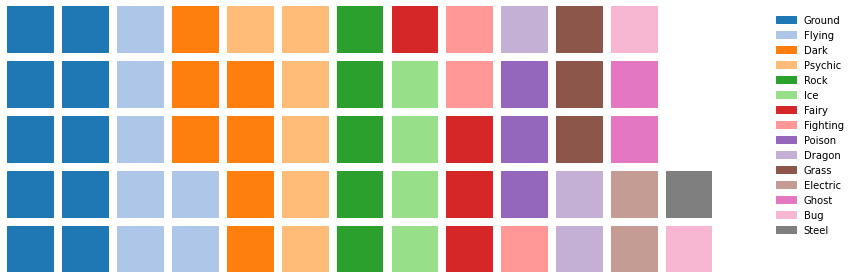

In [54]:
from pywaffle import Waffle

# To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    values = type_1_water_frequency.values,
    labels = list(type_1_water_frequency.index),
    figsize=(12, 8),
    legend = {'loc' : 'upper right', 'bbox_to_anchor' : (1.2, 1), 'framealpha': 0},
    cmap_name="tab20"
)

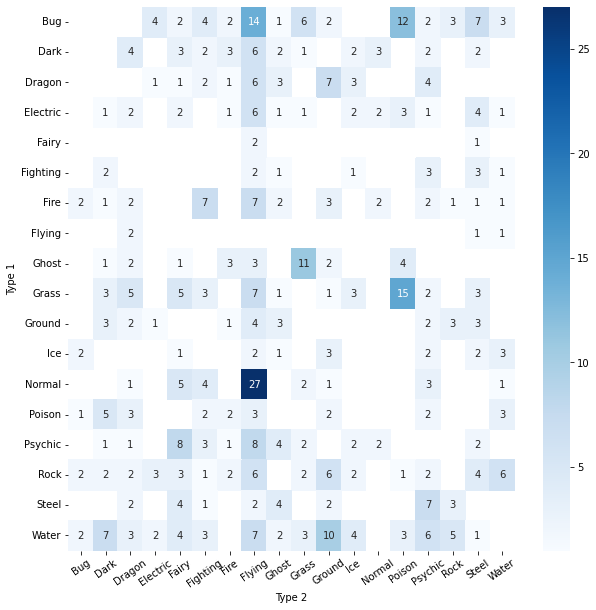

In [55]:
special_mask = pokemon_df[pokemon_df['type_2'] != 'None']
status_per_gen = special_mask.groupby(['type_1', 'type_2']).size().unstack()
plt.figure(figsize = (10, 10))
sb.heatmap(status_per_gen, annot=True, cmap="Blues")
plt.xlabel('Type 2')
plt.ylabel('Type 1')
plt.xticks(rotation=35)
plt.show()

## Ability 1 frequency
I do as I did above for the columns type_1 and type_2

In [56]:
# To search how many Pokemon I have for each Type 1, I simply use value_counts()
abil_1_frequency = pokemon_df['ability_1'].value_counts()
abil_1_frequency

Levitate           40
Swift Swim         30
Keen Eye           28
Chlorophyll        25
Pressure           25
                   ..
Minus               1
Battery             1
Power Construct     1
White Smoke         1
Delta Stream        1
Name: ability_1, Length: 210, dtype: int64

In [57]:
# I focus on the Abilities 1 held by at least 10 pokemon
abil_1_mask = abil_1_frequency[abil_1_frequency.values >= 10]
abil_1_mask

Levitate        40
Swift Swim      30
Keen Eye        28
Chlorophyll     25
Pressure        25
Overgrow        24
Blaze           24
Torrent         24
Intimidate      22
Sturdy          20
Swarm           20
Pickup          17
Run Away        16
Thick Fat       15
Inner Focus     14
Clear Body      13
Shed Skin       13
Poison Point    13
Cute Charm      12
Guts            12
Static          12
Oblivious       12
Water Absorb    12
Natural Cure    12
Rock Head       11
Hyper Cutter    11
Synchronize     11
Sand Veil       11
Beast Boost     11
Own Tempo       10
Gluttony        10
Name: ability_1, dtype: int64

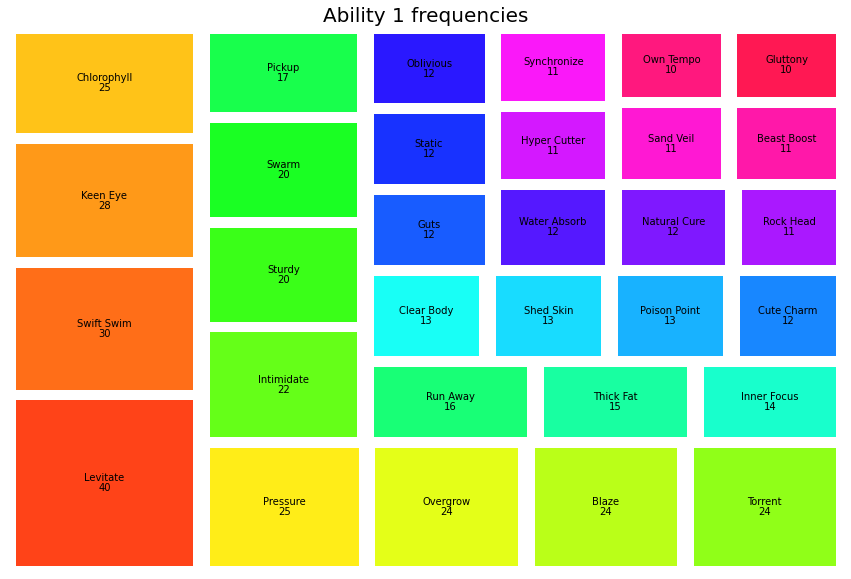

In [58]:
plt.figure(figsize = (15, 10))
plt.title("Ability 1 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = abil_1_mask.values, label = abil_1_mask.index, value = abil_1_mask.values,
              alpha=0.9, color=sb.color_palette("hsv", len(abil_1_mask.index)), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

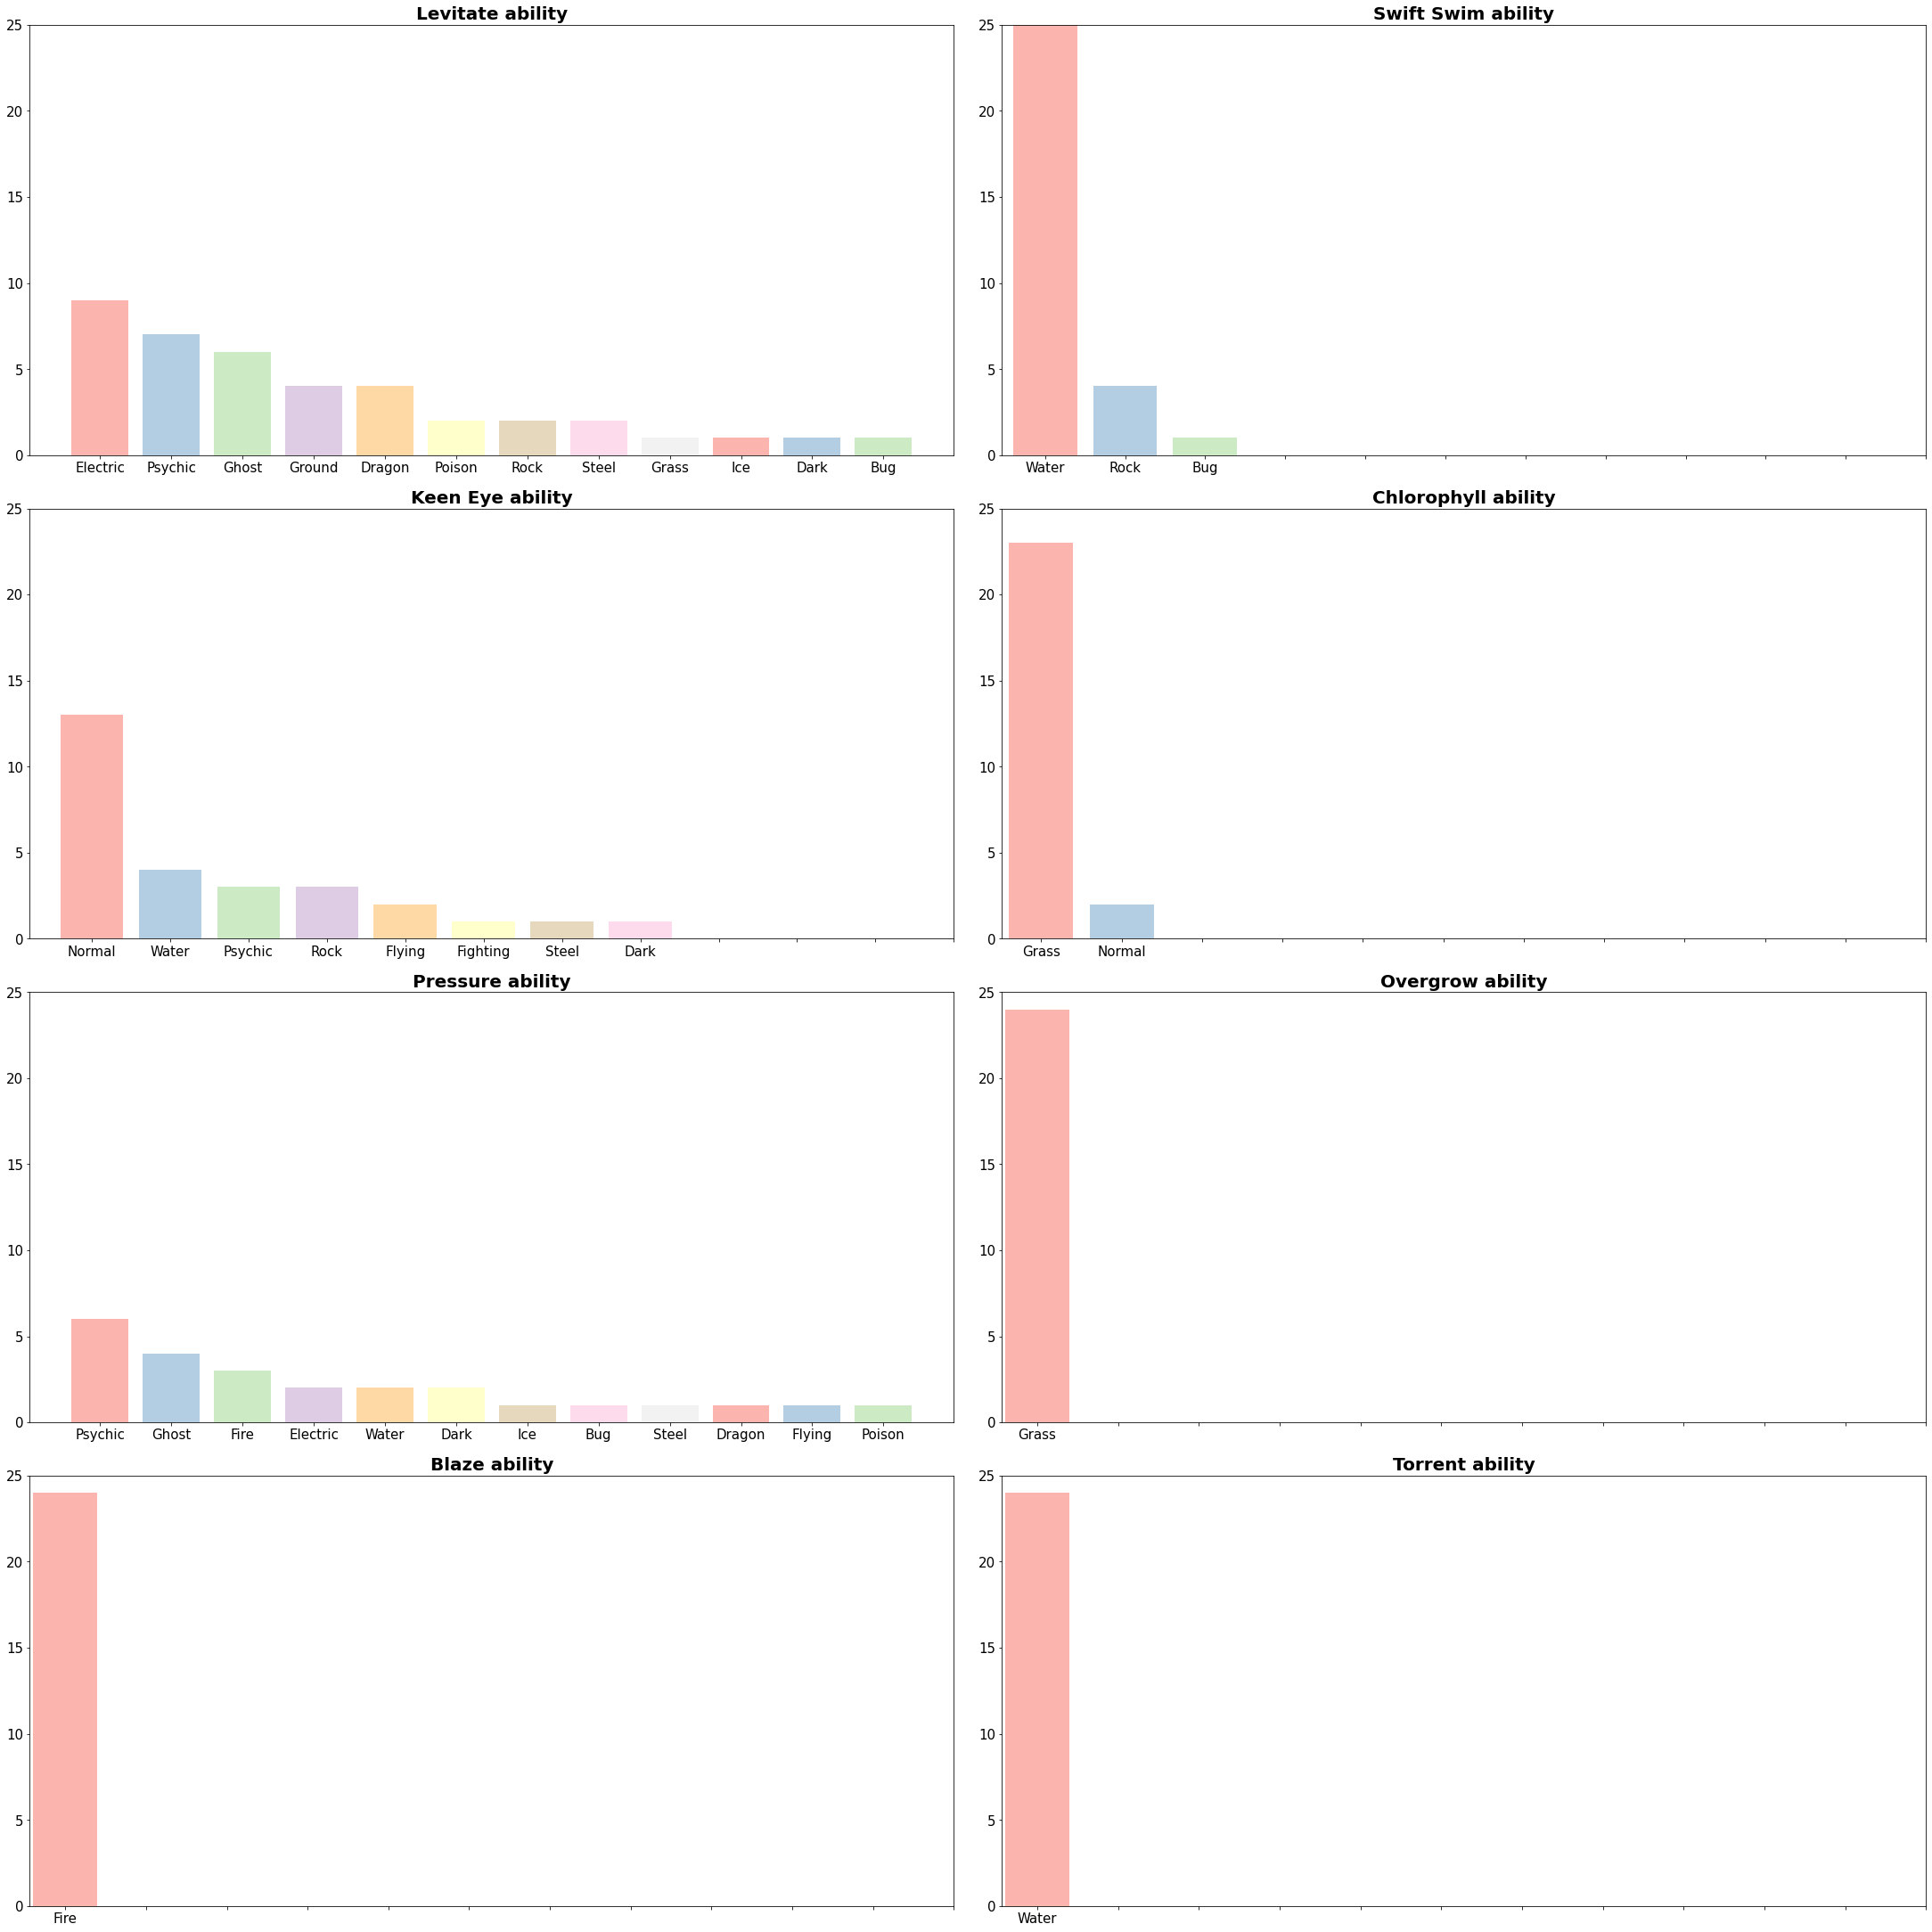

In [59]:
# I check the frequency of Ability 1 associated with Types 1 (as I did before with Types 2 associated with Types 1)
abil_1_list = pokemon_df['ability_1'].value_counts().index

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  type_1 = pokemon_df[pokemon_df['ability_1'] == abil_1_list[i]]
  abil_1_frequency = type_1['type_1'].value_counts()
  ax.bar(abil_1_frequency.index, abil_1_frequency.values, label = abil_1_list[i], color = sb.color_palette("Pastel1", len(abil_1_frequency.index)))
  ax.tick_params(axis = 'both', labelsize = 15)
  ax.set_ylim([0, 25])
  ax.set_xticks(range(12))
  ax.set_title(abil_1_list[i] + " ability", fontsize = 20, fontweight='bold')
plt.show()

## Ability 2 frequency

In [60]:
# First of all, I only want the Pokemon who have an Ability 2 -> I use a boolean mask 
abil_2_present_mask = pokemon_df[pokemon_df['ability_2'] != 'None']
abil_2_present_mask

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
20,16,Pidgey,1,Normal,Tiny Bird Pokémon,2,Normal,Flying,0.3,1.8,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
21,17,Pidgeotto,1,Normal,Bird Pokémon,2,Normal,Flying,1.1,30.0,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
22,18,Pidgeot,1,Normal,Bird Pokémon,2,Normal,Flying,1.5,39.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
24,19,Rattata,1,Normal,Mouse Pokémon,1,Normal,None,0.3,3.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
25,19,Alolan Rattata,1,Normal,Mouse Pokémon,2,Dark,Normal,0.3,3.8,...,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,883,Arctovish,8,Normal,Fossil Pokémon,2,Water,Ice,2.0,175.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1007,884,Duraludon,8,Normal,Alloy Pokémon,2,Steel,Dragon,1.8,40.0,...,2.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0
1008,885,Dreepy,8,Normal,Lingering Pokémon,2,Dragon,Ghost,0.5,2.0,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0
1009,886,Drakloak,8,Normal,Caretaker Pokémon,2,Dragon,Ghost,1.4,11.0,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0


In [61]:
# The first len is for how manyy Pokemon don't have a Type 2, the second for these who do
type_df_len = [(len(pokemon_df.index) - len(abil_2_present_mask.index)), len(abil_2_present_mask.index)]
name = ["Pokemon without an Ability 2", "Pokemon with an Ability 2"]
# This is for the colors of the plot
colors = ['#B7C3F3', '#8EB897']

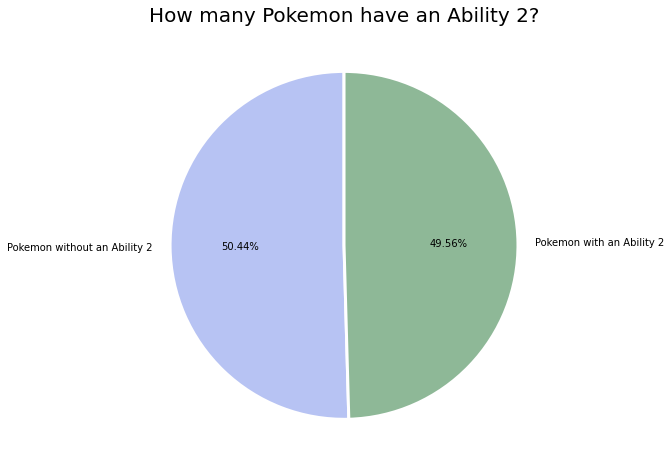

In [62]:
# I use a pie chart
plt.figure(figsize=(10, 8))
# I make the title bigger so it is more readable
plt.title("How many Pokemon have an Ability 2?", fontdict = {'fontsize' : 20})
plt.pie(type_df_len, labels = name, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = colors)
#plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

In [63]:
# To search how many Pokemon I have for each Type 1, I simply use value_counts()
abil_2_frequency = abil_2_present_mask['ability_2'].value_counts()
abil_2_frequency

Frisk           17
Sturdy          14
Shell Armor     13
Own Tempo       12
Technician      10
                ..
Stall            1
Simple           1
Snow Warning     1
Drought          1
Heavy Metal      1
Name: ability_2, Length: 125, dtype: int64

In [64]:
# I focus on the Abilities 2 held by at least 10 pokemon
abil_2_mask = abil_2_frequency[abil_2_frequency.values >= 10]
abil_2_mask

Frisk          17
Sturdy         14
Shell Armor    13
Own Tempo      12
Technician     10
Early Bird     10
Infiltrator    10
Inner Focus    10
Name: ability_2, dtype: int64

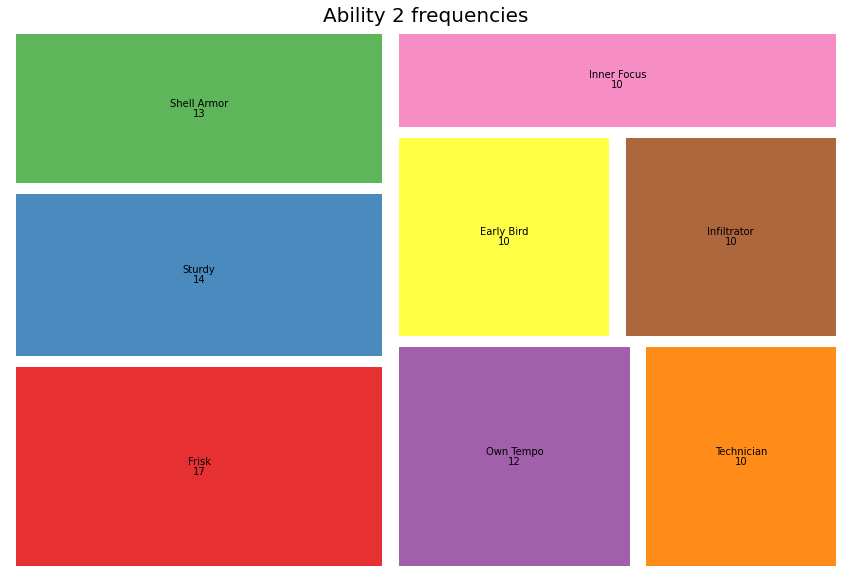

In [65]:
plt.figure(figsize = (15, 10))
plt.title("Ability 2 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = abil_2_mask.values, label = abil_2_mask.index, value = abil_2_mask.values,
              alpha=0.9, color=sb.color_palette("Set1", len(abil_1_mask.index)), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

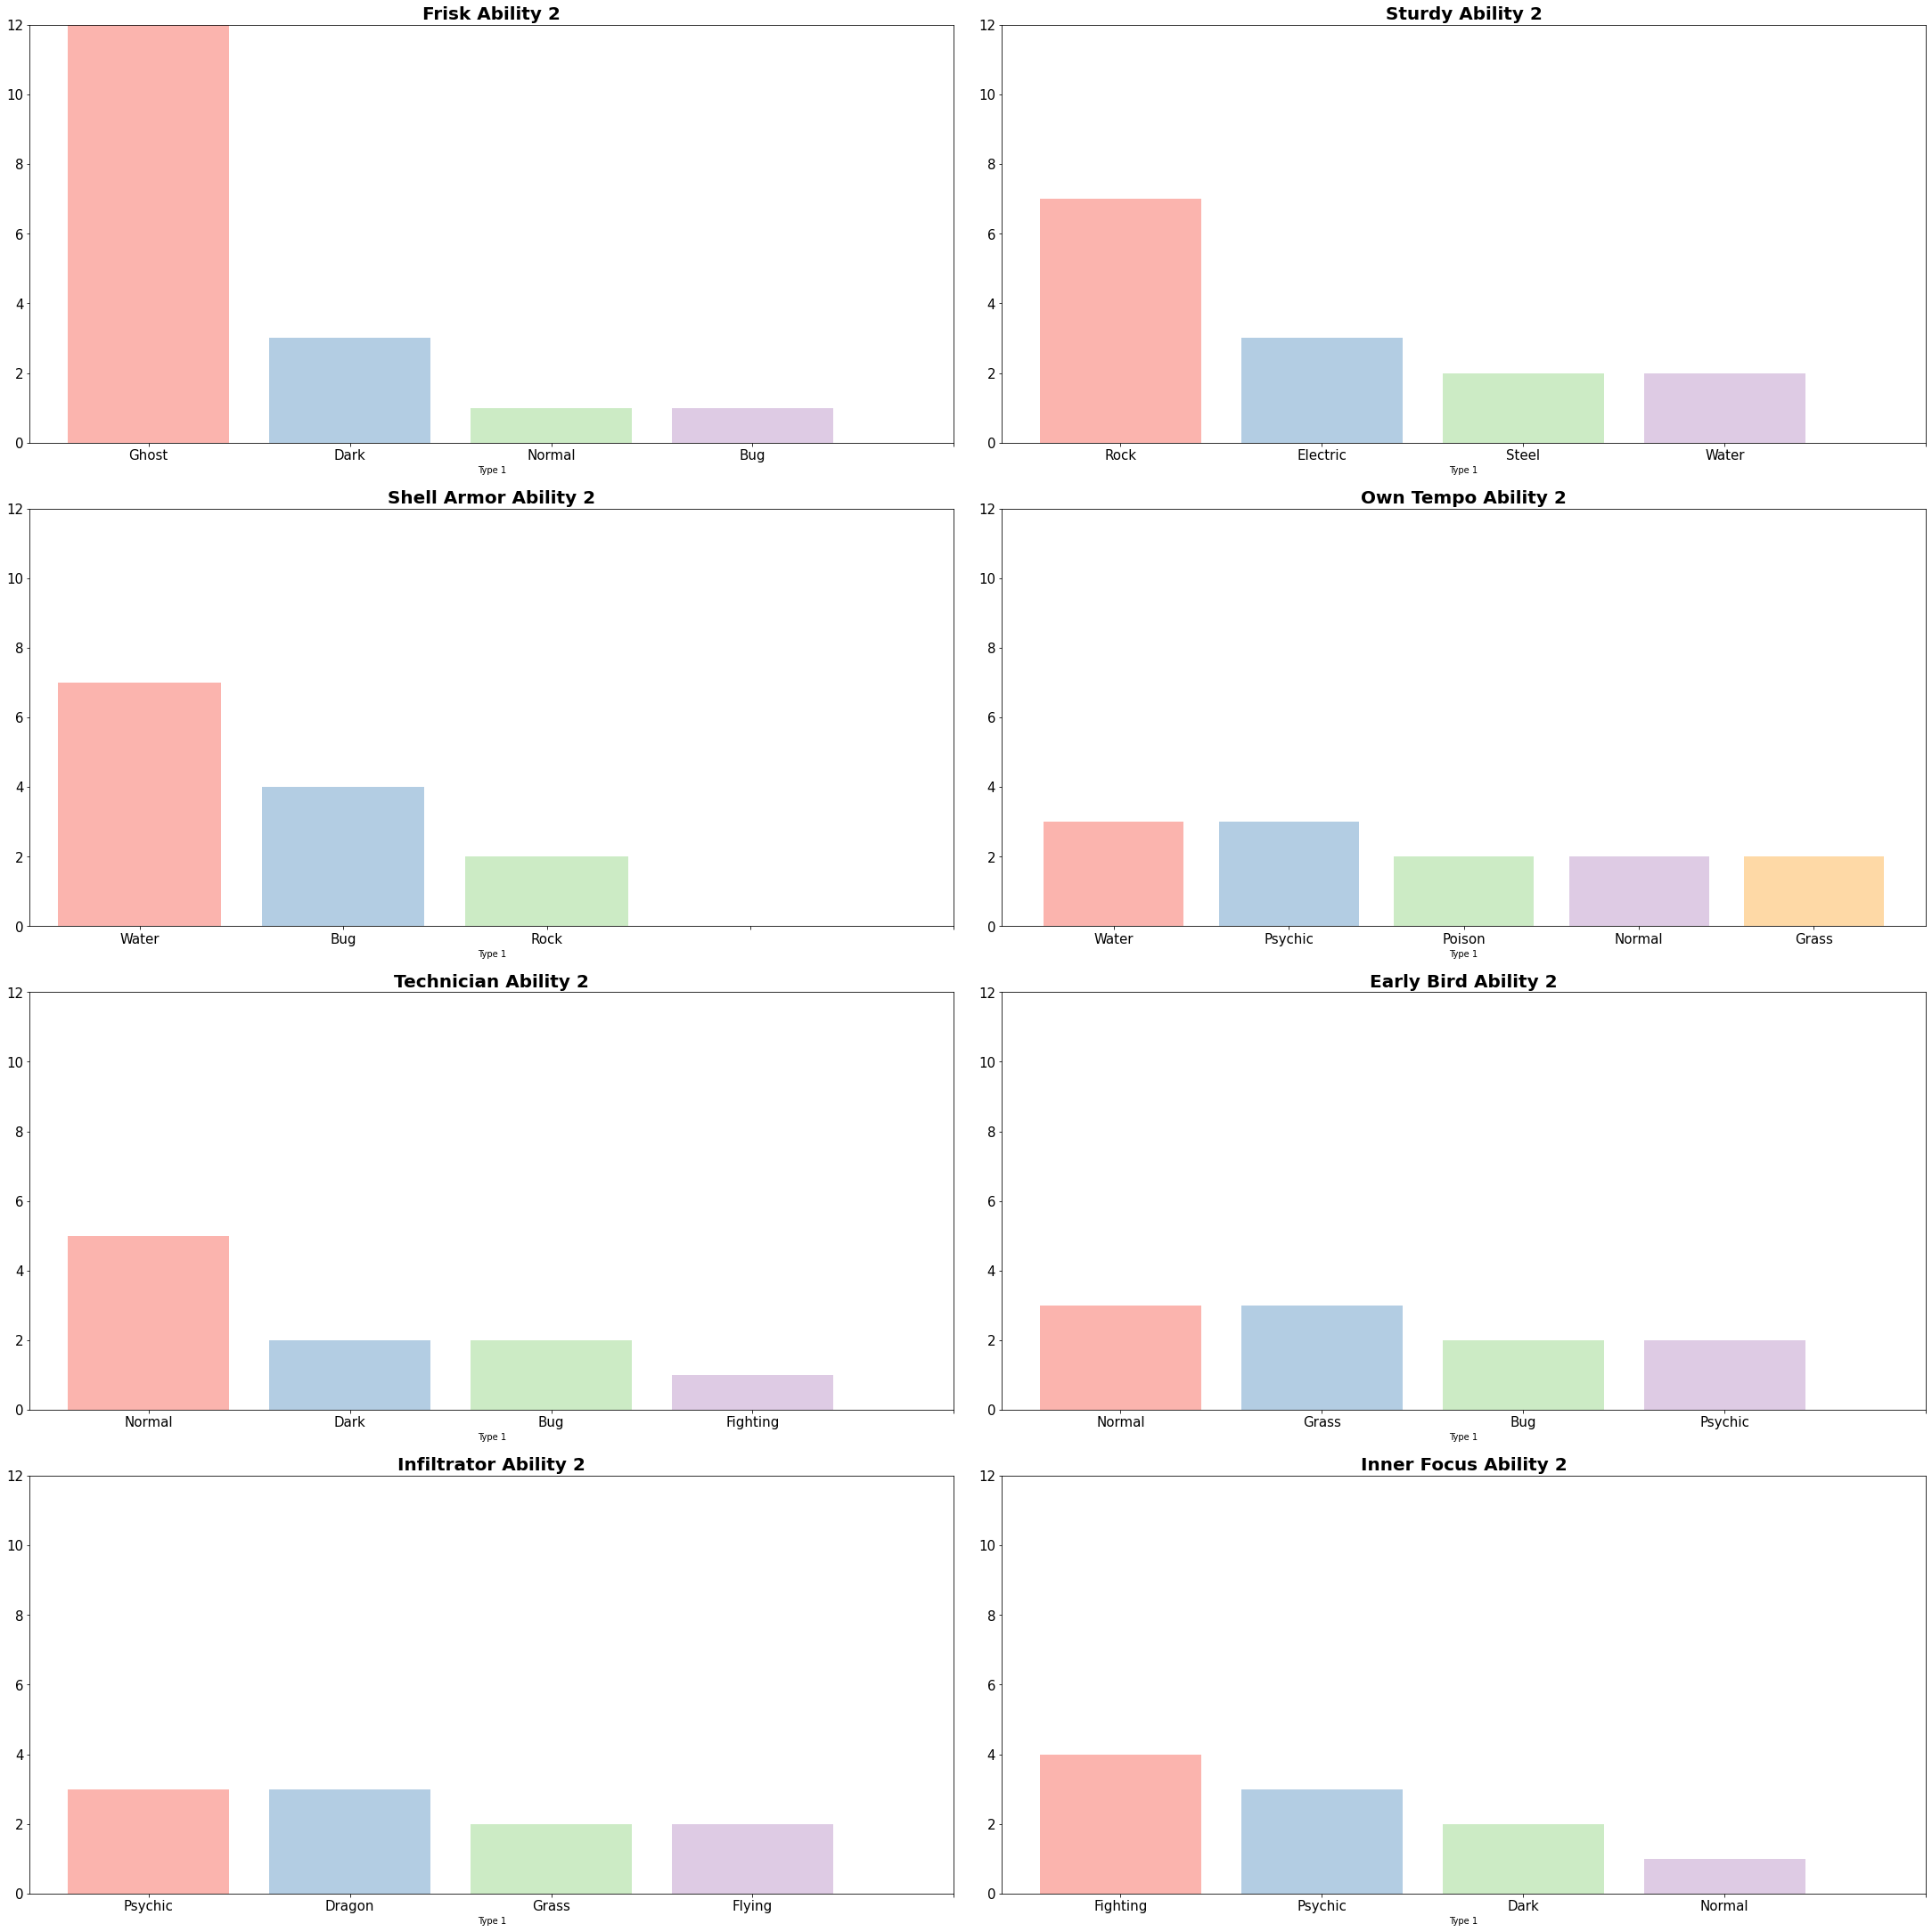

In [66]:
# I check the frequency of Ability 2 associated with Types 1 (as I did for Ability 1)
abil_list = abil_2_present_mask['ability_2'].value_counts().index

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  type_1 = abil_2_present_mask[abil_2_present_mask['ability_2'] == abil_list[i]]
  abil_2_frequency = type_1['type_1'].value_counts()
  ax.bar(abil_2_frequency.index, abil_2_frequency.values, label = abil_list[i], color = sb.color_palette("Pastel1", len(abil_2_frequency.index)))
  ax.set_xlabel('Type 1', fontsize = 10)
  ax.set_ylim([0, 12])
  ax.set_xticks(range(5))
  ax.tick_params(axis = 'both', labelsize = 15)
  ax.set_title(abil_list[i] + " Ability 2", fontsize = 20, fontweight='bold')
plt.show()

## Strongest Pokemon

In [67]:
# The strongest Pokemon by Total points
strongest_pokemon = pokemon_df['total_points'] == pokemon_df['total_points'].max()
pokemon_df[strongest_pokemon]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
186,150,Mega Mewtwo X,1,Legendary,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,...,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0
187,150,Mega Mewtwo Y,1,Legendary,Genetic Pokémon,1,Psychic,None,1.5,33.0,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
453,384,Mega Rayquaza,3,Legendary,Sky High Pokémon,2,Dragon,Flying,10.8,392.0,...,0.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0


In [68]:
weakest_pokemon = pokemon_df['total_points'] == pokemon_df['total_points'].min()
pokemon_df[weakest_pokemon]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
861,746,Wishiwashi Solo Form,7,Normal,Small Fry Pokémon,1,Water,None,0.2,0.3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


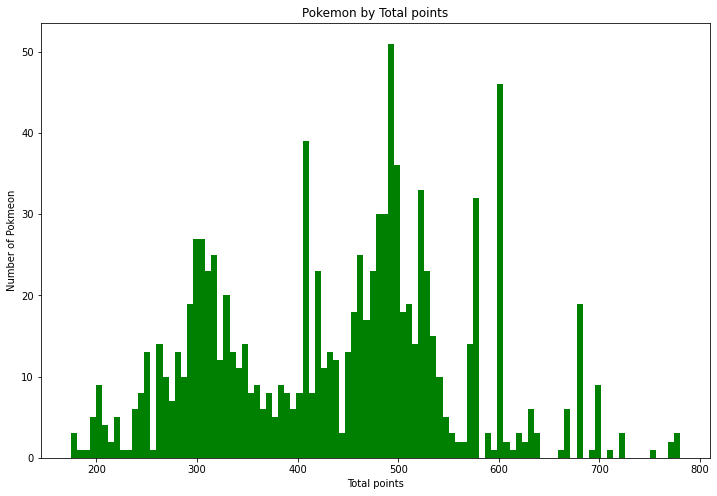

In [69]:
pokemon_df.hist(column = 'total_points', figsize=[12, 8],color = "green", bins=100, grid=False)
plt.title('Pokemon by Total points', fontsize= 18, fontweight='bold')
plt.xlabel('Total points')
plt.ylabel('Number of Pokmeon')
plt.show()

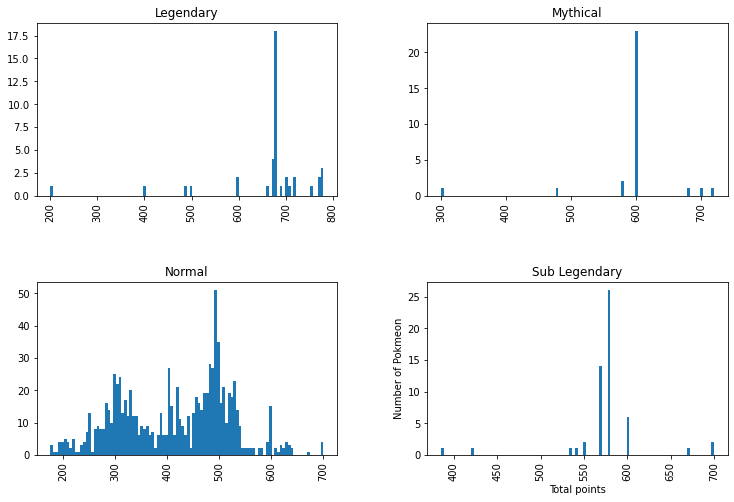

In [70]:
pokemon_df.hist(column = 'total_points', by='status', figsize=[12, 8], bins=100)
plt.xlabel('Total points')
plt.ylabel('Number of Pokmeon')
plt.show()

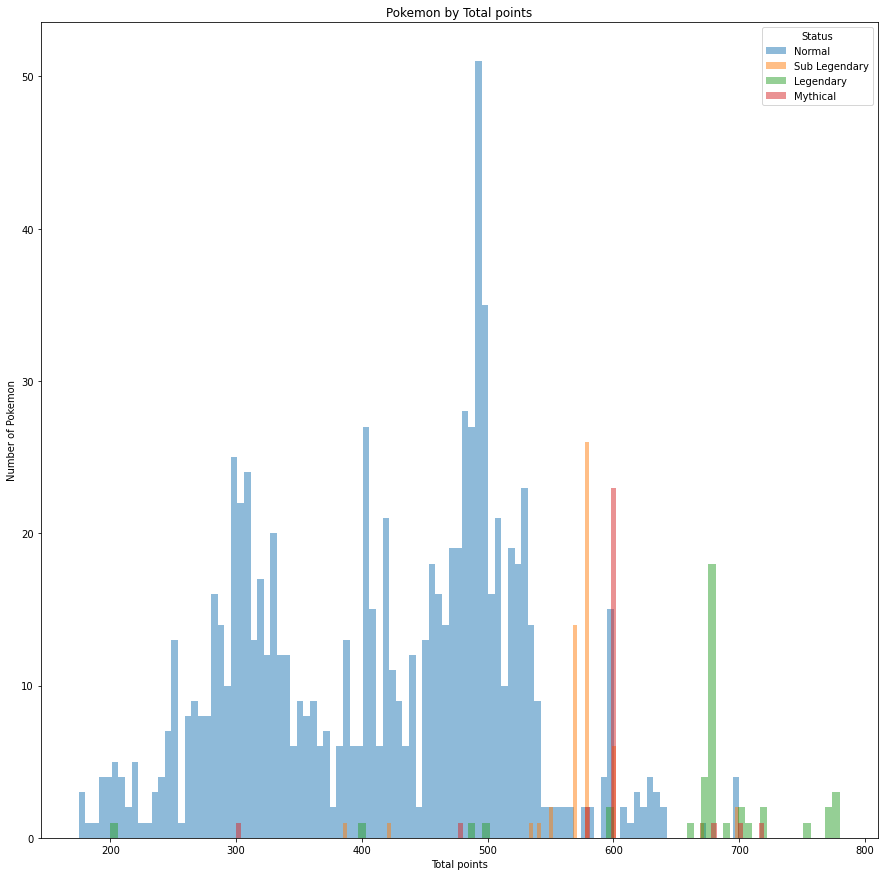

In [71]:
plt.figure(figsize = (15, 15))
for i in range(len(status_list)):
  plt.hist(pokemon_df.loc[pokemon_df['status'] == status_list[i], 'total_points'], alpha= 0.5,  label= status_list[i], bins = 100)
plt.title('Pokemon by Total points and by Status', fontsize= 18, fontweight='bold')
plt.xlabel('Total points')
plt.ylabel('Number of Pokemon')
plt.legend(title='Status')
plt.show()

In [72]:
strongest_10_Pokemon = pokemon_df.sort_values('total_points', ascending=False).head(10)
strongest_10_Pokemon

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
187,150,Mega Mewtwo Y,1,Legendary,Genetic Pokémon,1,Psychic,None,1.5,33.0,...,1.0,1.0,0.5,2.00,1.00,2.0,1.0,2.0,1.0,1.0
453,384,Mega Rayquaza,3,Legendary,Sky High Pokémon,2,Dragon,Flying,10.8,392.0,...,0.0,1.0,1.0,0.50,1.00,1.0,2.0,1.0,1.0,2.0
186,150,Mega Mewtwo X,1,Legendary,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,...,1.0,2.0,1.0,1.00,0.50,2.0,1.0,1.0,1.0,2.0
451,383,Primal Groudon,3,Legendary,Continent Pokémon,2,Ground,Fire,5.0,999.7,...,2.0,1.0,1.0,0.50,1.00,1.0,1.0,1.0,0.5,0.5
449,382,Primal Kyogre,3,Legendary,Sea Basin Pokémon,1,Water,None,9.8,430.0,...,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0
920,800,Ultra Necrozma,7,Legendary,Prism Pokémon,2,Psychic,Dragon,7.5,230.0,...,1.0,1.0,0.5,2.00,1.00,2.0,2.0,2.0,1.0,2.0
1013,889,Zamazenta Crowned Shield,8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
579,493,Arceus,4,Mythical,Alpha Pokémon,1,Normal,None,3.2,320.0,...,1.0,1.0,1.0,1.00,1.00,0.0,1.0,1.0,1.0,1.0
1011,888,Zacian Crowned Sword,8,Legendary,Warrior Pokémon,2,Fairy,Steel,2.8,355.0,...,2.0,0.5,0.5,0.25,0.50,1.0,0.0,0.5,1.0,0.5
825,718,Zygarde Complete Forme,6,Legendary,Order Pokémon,2,Dragon,Ground,4.5,610.0,...,1.0,1.0,1.0,1.00,0.50,1.0,2.0,1.0,1.0,2.0


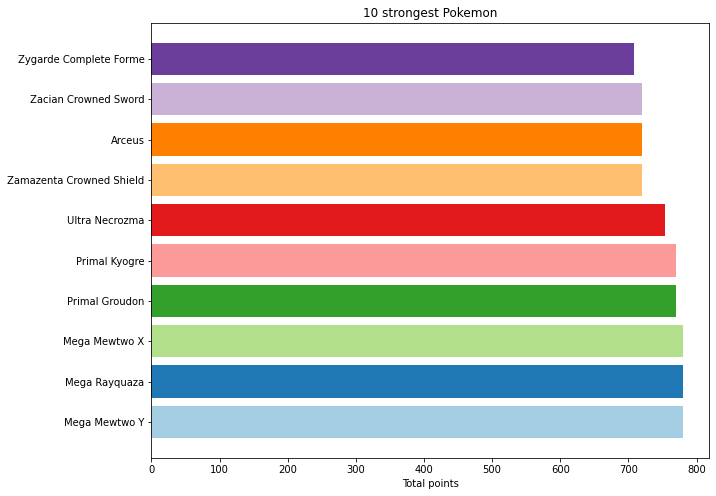

In [73]:
plt.figure(figsize = (10, 8))
plt.title('10 strongest Pokemon', fontsize= 18, fontweight='bold')
# I use horizontal bars
plt.barh(strongest_10_Pokemon.name, strongest_10_Pokemon.total_points, color = sb.color_palette("Paired"))
plt.xlabel('Total points')
plt.show()

### Other plots

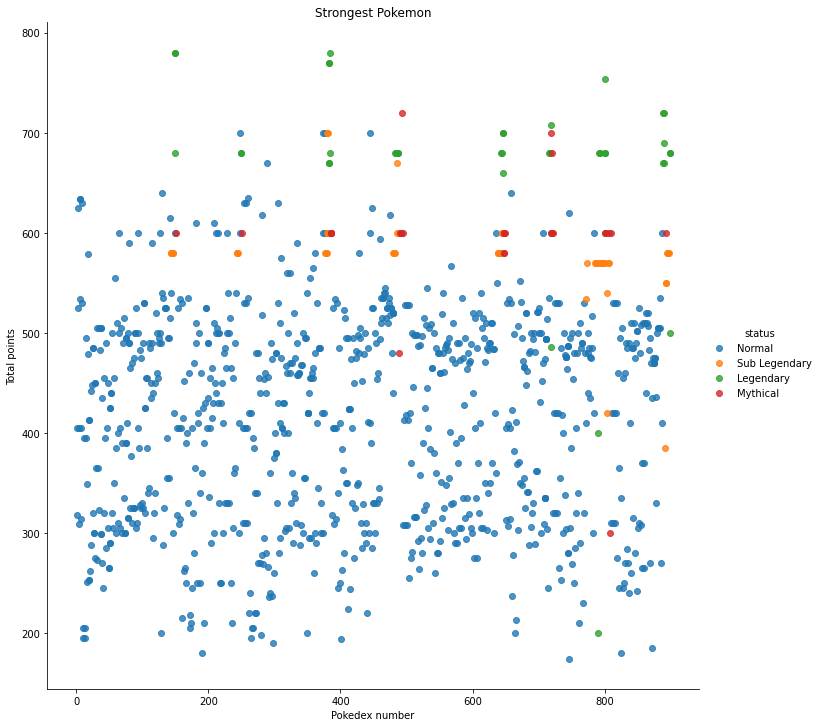

In [74]:
sb.lmplot(x = 'pokedex_number', y = 'total_points', data=pokemon_df, fit_reg=False, hue = 'status', legend = True, height=10, aspect=1)
plt.title('Strongest Pokemon')
plt.xlabel('Pokedex number')
plt.ylabel('Total points')
plt.show()

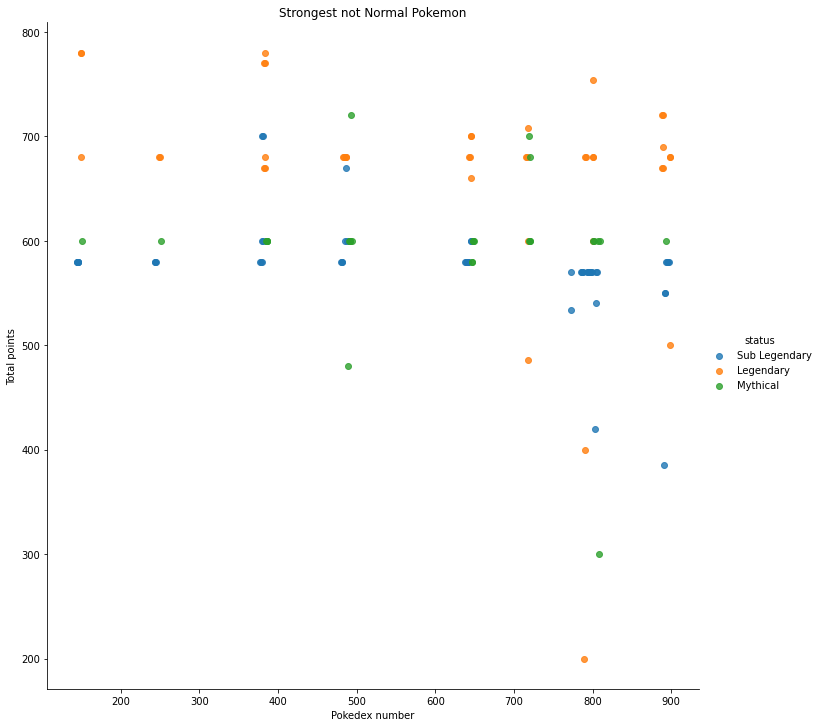

In [75]:
# I focus on the "special" Pokemon
special_mask = pokemon_df[pokemon_df['status'] != 'Normal']
sb.lmplot(x = 'pokedex_number', y = 'total_points', data = special_mask, fit_reg = False, hue = 'status', legend = True, height=10, aspect=1)
plt.title('Strongest not Normal Pokemon')
plt.xlabel('Pokedex number')
plt.ylabel('Total points')
plt.show()

## Correlation

In [76]:
# I want a list of the columns split by type
pokemon_df.columns.to_series().groupby(pokemon_df.dtypes).groups

{int64: ['pokedex_number', 'generation', 'type_number', 'abilities_number', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], float64: ['height_m', 'weight_kg', 'catch_rate', 'base_friendship', 'base_experience', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy'], object: ['name', 'status', 'species', 'type_1', 'type_2', 'ability_1', 'ability_2', 'ability_hidden']}

In [77]:
correlation = pokemon_df.corr()
correlation

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
pokedex_number,1.000000,0.962988,0.036717,0.041503,0.118748,-0.150202,0.128639,0.103080,0.119839,0.090722,...,0.012480,0.007715,-0.080805,0.007523,-0.044575,0.091065,0.016608,0.041014,0.089523,0.159600
generation,0.962988,1.000000,0.031512,0.016976,0.082419,-0.132392,0.082254,0.083217,0.084613,0.054625,...,0.013915,0.031505,-0.063808,0.005273,-0.032581,0.083696,-0.003839,0.035024,0.077334,0.135269
type_number,0.036717,0.031512,1.000000,0.135811,0.109025,-0.052645,0.210752,0.087146,0.142618,0.202581,...,-0.041560,0.075940,-0.052655,-0.119705,0.190255,0.100145,0.000834,0.033470,0.055005,0.072518
height_m,0.041503,0.016976,0.135811,1.000000,0.649240,-0.225693,0.529858,0.444976,0.425729,0.362264,...,0.030552,-0.067577,-0.014624,-0.029599,-0.058018,0.048797,0.197041,0.021785,-0.031523,0.116232
weight_kg,0.118748,0.082419,0.109025,0.649240,1.000000,-0.242467,0.477097,0.439987,0.427627,0.472243,...,0.153260,-0.144024,-0.090361,-0.031392,-0.115098,0.055691,0.106940,0.031135,0.013894,0.057191
abilities_number,-0.150202,-0.132392,-0.052645,-0.225693,-0.242467,1.000000,-0.431177,-0.163731,-0.329894,-0.239165,...,0.093469,0.026495,0.064833,-0.017942,-0.014200,-0.191115,-0.073622,-0.116556,0.021538,-0.049542
total_points,0.128639,0.082254,0.210752,0.529858,0.477097,-0.431177,1.000000,0.637551,0.740648,0.619844,...,0.035220,-0.097065,-0.088760,-0.004148,-0.051070,0.145292,0.107254,0.081432,-0.000204,0.132481
hp,0.103080,0.083217,0.087146,0.444976,0.439987,-0.163731,0.637551,1.000000,0.444656,0.273661,...,-0.006632,-0.050198,-0.026921,0.032457,-0.062799,-0.040645,0.139863,0.011747,0.033547,0.152900
attack,0.119839,0.084613,0.142618,0.425729,0.427627,-0.329894,0.740648,0.444656,1.000000,0.465088,...,0.065329,-0.009170,-0.010105,-0.058429,-0.136821,-0.012668,0.129507,-0.107337,0.009462,0.213566
defense,0.090722,0.054625,0.202581,0.362264,0.472243,-0.239165,0.619844,0.273661,0.465088,1.000000,...,0.161508,-0.128418,-0.101382,-0.050246,-0.166526,0.140182,-0.032124,0.053552,0.054481,-0.005181


In [78]:
corr = pokemon_df.corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr

pokedex_number  generation          0.962988
                type_number         0.036717
                height_m            0.041503
                weight_kg           0.118748
                abilities_number   -0.150202
                                      ...   
against_fairy   against_rock       -0.215756
                against_ghost      -0.125208
                against_dragon      0.438897
                against_dark       -0.292887
                against_steel       0.144404
Length: 1122, dtype: float64

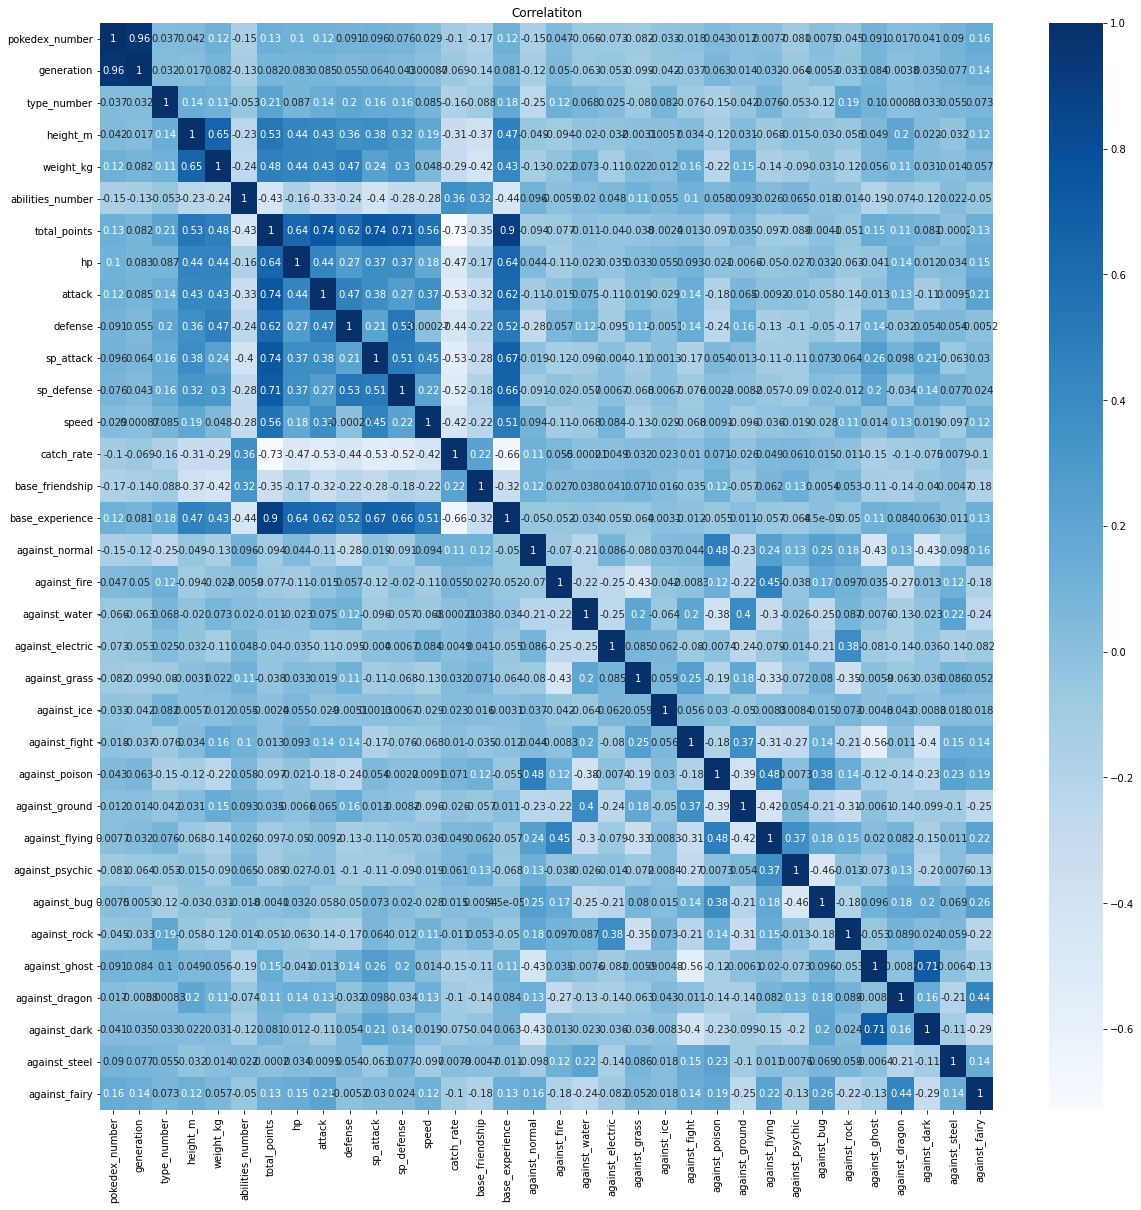

In [79]:
plt.figure(figsize = (20, 20))
sb.heatmap(pokemon_df.corr(), annot = True, cmap="Blues").set_title('Correlatiton')
plt.show()

I split the dataframe in 2:

- 'against' columns;
- remaining columns.

In [80]:
# I create a list for the columns with against in them
against = []
for i in pokemon_df.columns:
    if 'against' in i:
      against.append(i) 

against_df = pokemon_df[against]
against_df

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1023,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1024,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1025,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


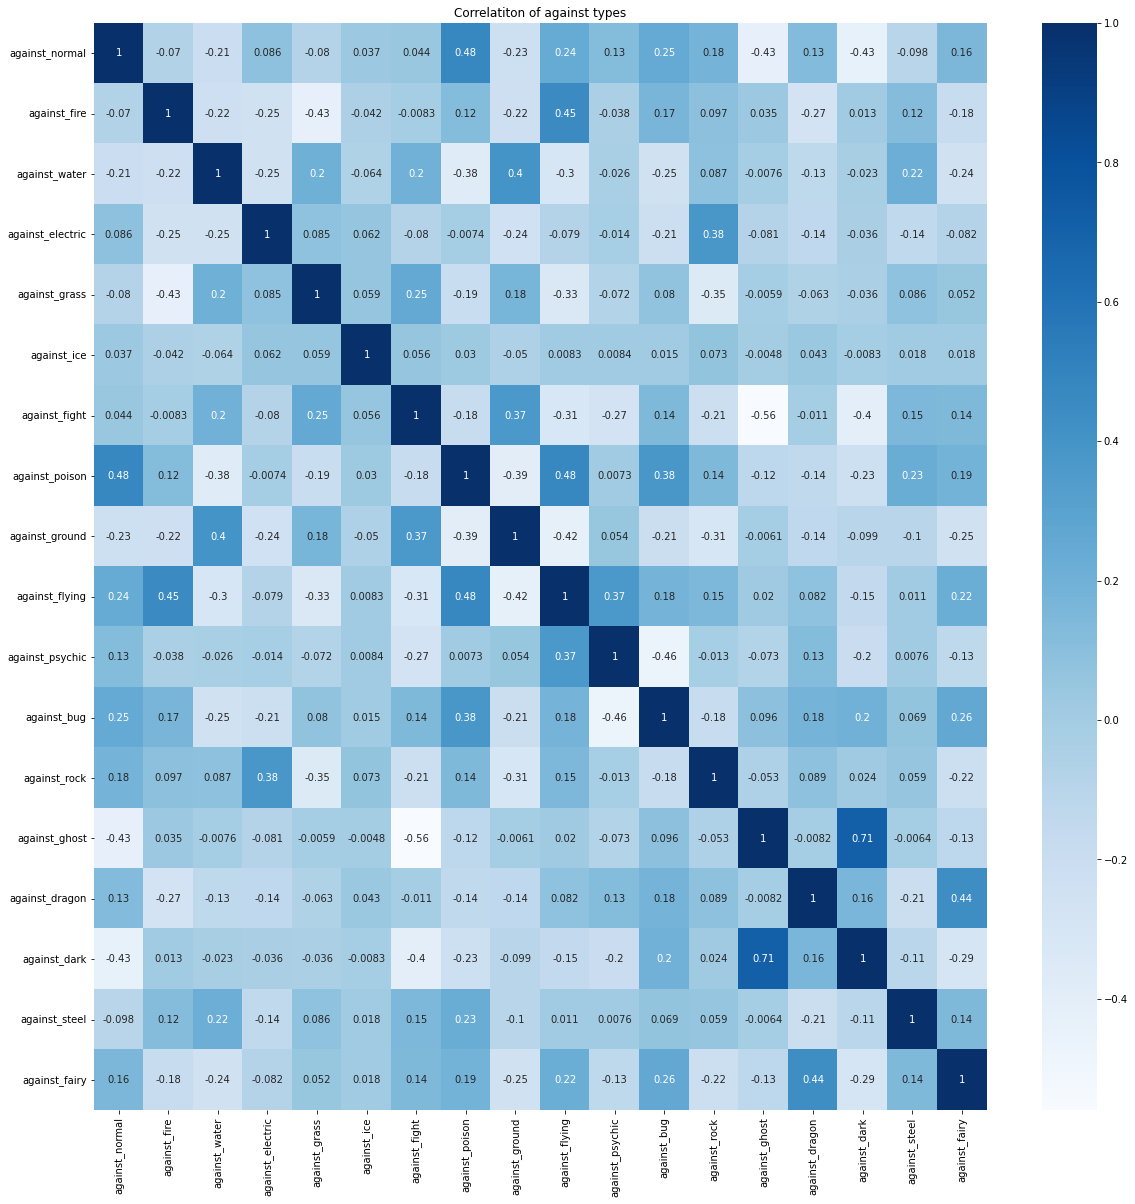

In [81]:
plt.figure(figsize = (20, 20))
sb.heatmap(against_df.corr(), annot = True, cmap="Blues").set_title('Correlatiton of against types')
plt.show()

In [82]:
stats = []
for i in pokemon_df.columns:
    if 'against' not in i:
      stats.append(i) 

stats_df = pokemon_df[stats]
stats_df.drop(['type_number', 'abilities_number'], axis=1, inplace=True)
stats_df

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,ability_1,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience
0,1,Bulbasaur,1,Normal,Seed Pokémon,Grass,Poison,0.7,6.9,Overgrow,...,318,45,49,49,65,65,45,45.0,70.0,64.0
1,2,Ivysaur,1,Normal,Seed Pokémon,Grass,Poison,1.0,13.0,Overgrow,...,405,60,62,63,80,80,60,45.0,70.0,142.0
2,3,Venusaur,1,Normal,Seed Pokémon,Grass,Poison,2.0,100.0,Overgrow,...,525,80,82,83,100,100,80,45.0,70.0,236.0
3,3,Mega Venusaur,1,Normal,Seed Pokémon,Grass,Poison,2.4,155.5,Thick Fat,...,625,80,100,123,122,120,80,45.0,70.0,281.0
4,4,Charmander,1,Normal,Lizard Pokémon,Fire,None,0.6,8.5,Blaze,...,309,39,52,43,60,50,65,45.0,70.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,Ice,None,2.2,800.0,Chilling Neigh,...,580,100,145,130,65,110,30,3.0,48.4,258.8
1023,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,Ghost,None,2.0,44.5,Grim Neigh,...,580,100,65,60,145,80,130,3.0,48.4,258.8
1024,898,Calyrex,8,Legendary,King Pokémon,Psychic,Grass,1.1,7.7,Unnerve,...,500,100,80,80,80,80,80,3.0,0.0,296.1
1025,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,Psychic,Ice,2.4,809.1,As One,...,680,100,165,150,85,130,50,3.0,0.0,296.1


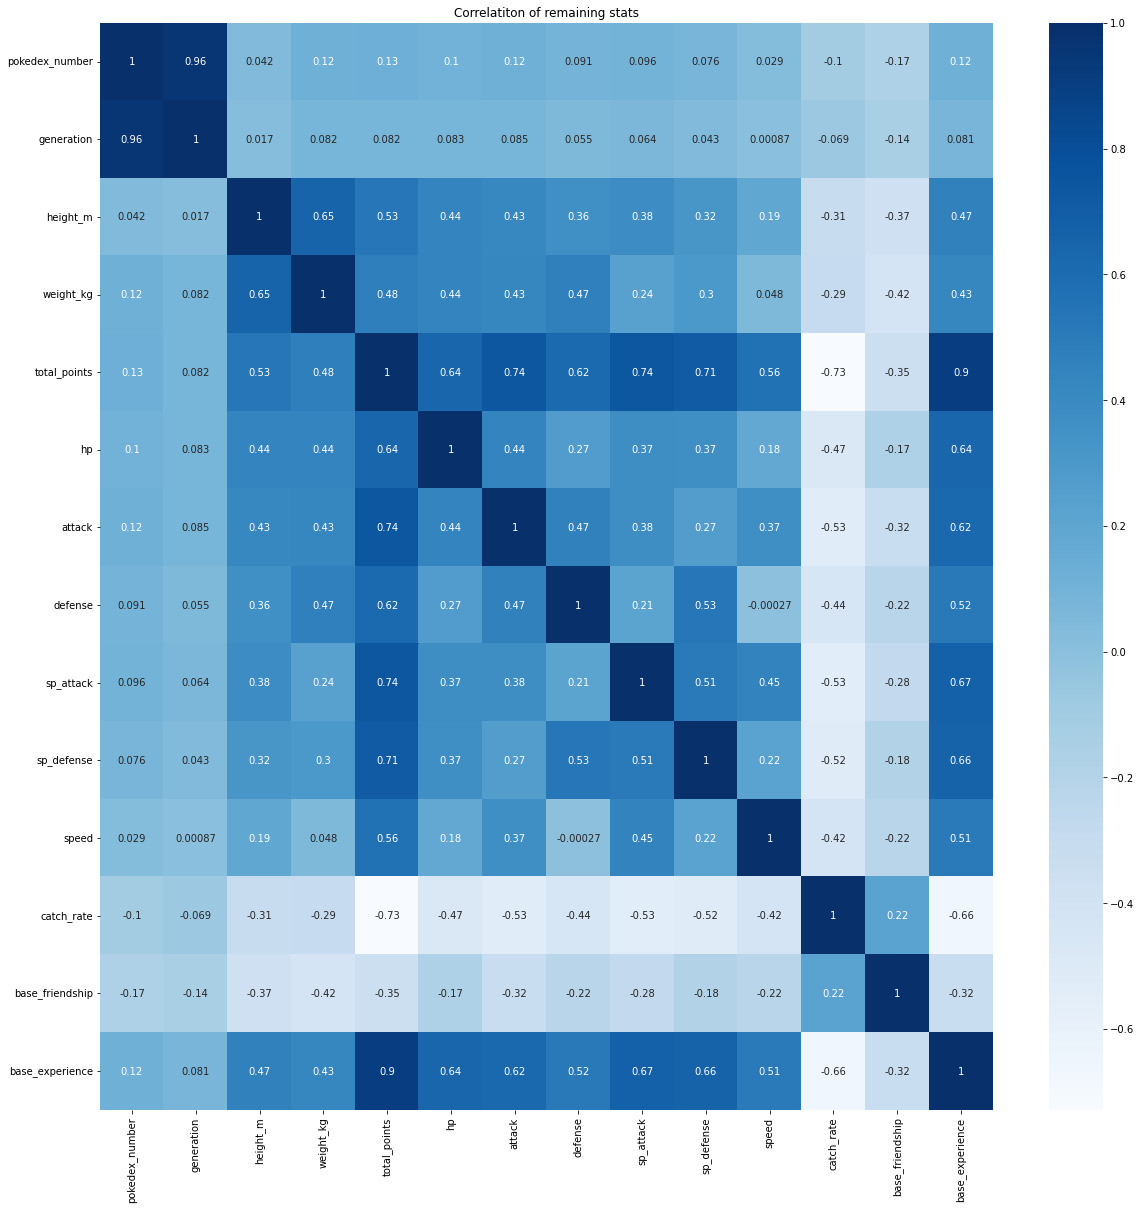

In [83]:
plt.figure(figsize = (20, 20))
sb.heatmap(stats_df.corr(), annot = True, cmap="Blues").set_title('Correlatiton of remaining stats')
plt.show()

## Pokedex number and generation

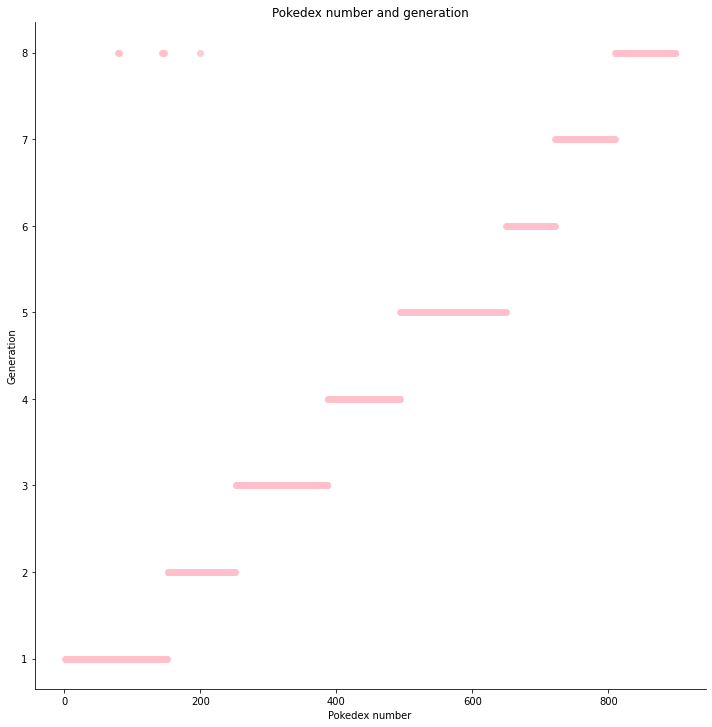

In [84]:
sb.lmplot(x = 'pokedex_number', y = 'generation', data= pokemon_df, scatter_kws={'color': 'pink'}, fit_reg=False, legend = True, height=10, aspect=1).fig.set_size_inches(10, 10)
plt.title('Pokedex number and generation')
plt.xlabel("Pokedex number")
plt.ylabel("Generation")
plt.show()

In [ ]:
print('The correlation between Pokedex number and Generation is:', pokemon_df['pokedex_number'].corr(pokemon_df['generation']))

## Height and weight

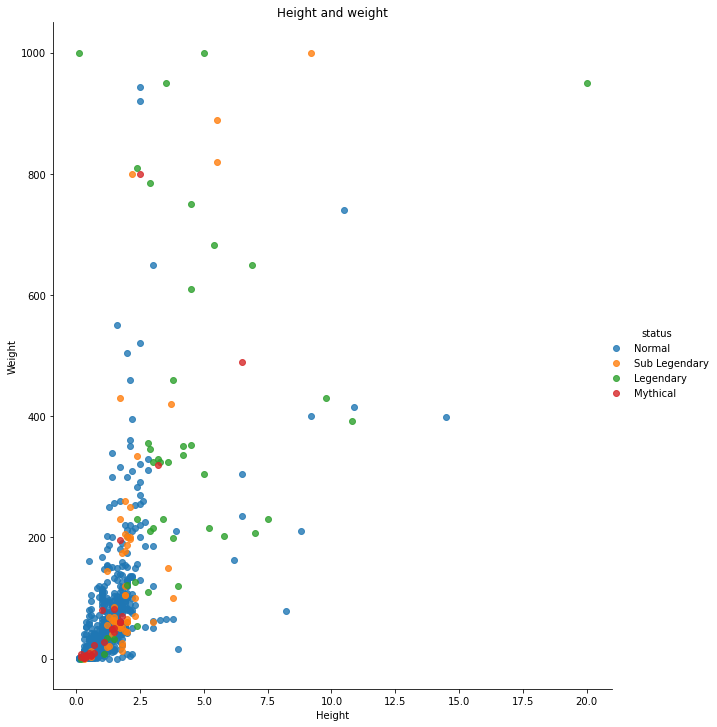

In [85]:
# I use hue to change color of the scatters based on the status of the Pokemon
sb.lmplot(x = 'height_m', y = 'weight_kg', data=pokemon_df, fit_reg=False, hue = 'status', legend = True, height=10, aspect=1).fig.set_size_inches(10, 10)
plt.title('Height and weight')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

I zoom in

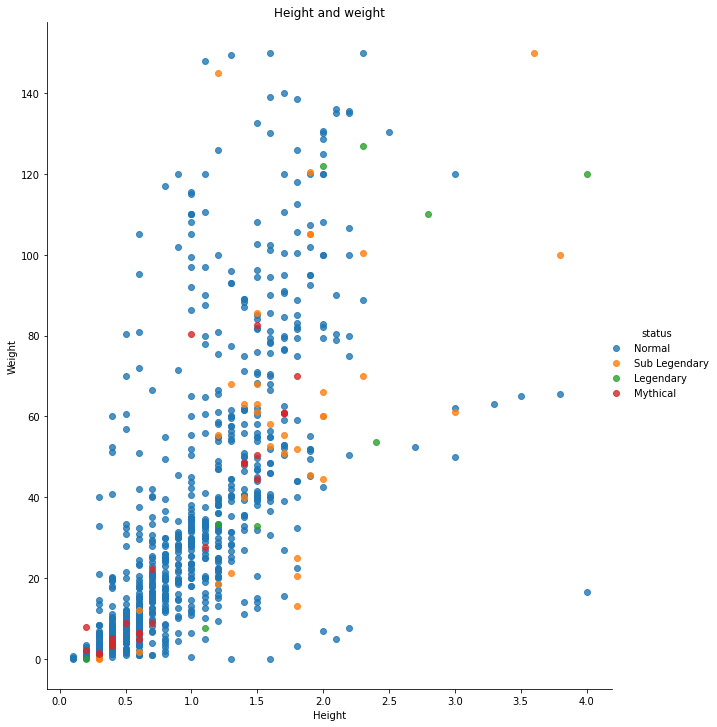

In [86]:
height_and_weight_mask = pokemon_df[(pokemon_df['height_m'] <= 4) & (pokemon_df['weight_kg'] <= 150)]

sb.lmplot(x = 'height_m', y = 'weight_kg', data= height_and_weight_mask, fit_reg= False, hue = 'status', legend = True, height= 10, aspect=1).fig.set_size_inches(10, 10)
plt.title('Height and weight')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [87]:
pokemon_df['height_m'].corr(pokemon_df['weight_kg']) 

0.6492401423143193

## "Against" plots

In [88]:
# The correaltion matrix
corr_matrix = against_df.corr()

In [89]:
# I don't want the values equal to 1 (it's self correlation), so I use a mask to ignore them
corr_mask = corr_matrix[corr_matrix < 1]

# I sort the correlation matrix and pick the 5 highest values
# [::2] is to skip the even rows (since I have doubles for each row)
top_5_corr_matrix = (corr_mask.stack().sort_values(ascending=False))[::2].head(5)
top_5_corr_matrix

against_ghost   against_dark      0.710828
against_normal  against_poison    0.480707
against_poison  against_flying    0.480229
against_fire    against_flying    0.453341
against_fairy   against_dragon    0.438897
dtype: float64

In [90]:
# I sort the correlation matrix and pick the 5 lowest values (for the negative correlation)
top_5_neg_corr_matrix = (corr_mask.stack().sort_values())[::2].head(5)
top_5_neg_corr_matrix

against_ghost    against_fight    -0.559629
against_psychic  against_bug      -0.462870
against_dark     against_normal   -0.433694
against_grass    against_fire     -0.430807
against_ghost    against_normal   -0.429284
dtype: float64

In [91]:
# I concatenate the above 5 top values to get the top 10 correlations both positive and negative
top_10_tot_corr_matrix = pd.concat([top_5_corr_matrix, top_5_neg_corr_matrix])
top_10_tot_corr_matrix

against_ghost    against_dark      0.710828
against_normal   against_poison    0.480707
against_poison   against_flying    0.480229
against_fire     against_flying    0.453341
against_fairy    against_dragon    0.438897
against_ghost    against_fight    -0.559629
against_psychic  against_bug      -0.462870
against_dark     against_normal   -0.433694
against_grass    against_fire     -0.430807
against_ghost    against_normal   -0.429284
dtype: float64

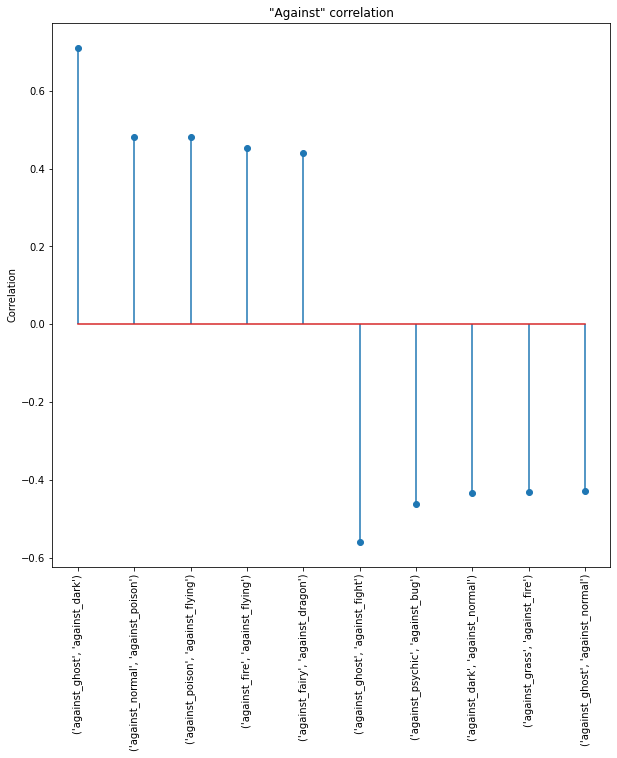

In [92]:
# I use a lollipop plot
plt.figure(figsize = (10, 10))
plt.title('"Against" correlation')
plt.stem(top_10_tot_corr_matrix, use_line_collection = True)
plt.ylabel('Correlation')

# To change the name on the y axis -> I want the names of the indexes
x = list(range(len(top_10_tot_corr_matrix)))
labels = []
for i in range(len(top_10_tot_corr_matrix)):
  labels.append(top_10_tot_corr_matrix.index[i])

plt.xticks(x, labels, rotation='vertical')
plt.show()

## "Stats" plots
I did the same as for "Against" plots

In [93]:
# I want the correaltion as a matrix
corr_matrix = stats_df.corr()
corr_matrix

,pokedex_number,generation,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience
pokedex_number,1.000000,0.962988,0.041503,0.118748,0.128639,0.103080,0.119839,0.090722,0.095698,0.076210,0.029485,-0.104576,-0.167275,0.118949
generation,0.962988,1.000000,0.016976,0.082419,0.082254,0.083217,0.084613,0.054625,0.064088,0.042960,0.000866,-0.069314,-0.135562,0.081140
height_m,0.041503,0.016976,1.000000,0.649240,0.529858,0.444976,0.425729,0.362264,0.382112,0.321292,0.194995,-0.307346,-0.366584,0.465969
weight_kg,0.118748,0.082419,0.649240,1.000000,0.477097,0.439987,0.427627,0.472243,0.236744,0.303028,0.048036,-0.293131,-0.424381,0.431699
total_points,0.128639,0.082254,0.529858,0.477097,1.000000,0.637551,0.740648,0.619844,0.738039,0.711406,0.561691,-0.728636,-0.350114,0.898823
hp,0.103080,0.083217,0.444976,0.439987,0.637551,1.000000,0.444656,0.273661,0.374152,0.368276,0.181254,-0.472529,-0.166450,0.637750
attack,0.119839,0.084613,0.425729,0.427627,0.740648,0.444656,1.000000,0.465088,0.375796,0.270031,0.369321,-0.531351,-0.320345,0.624656
defense,0.090722,0.054625,0.362264,0.472243,0.619844,0.273661,0.465088,1.000000,0.214438,0.527764,-0.000271,-0.443147,-0.217905,0.517194
sp_attack,0.095698,0.064088,0.382112,0.236744,0.738039,0.374152,0.375796,0.214438,1.000000,0.509864,0.450014,-0.534066,-0.277875,0.672475
sp_defense,0.076210,0.042960,0.321292,0.303028,0.711406,0.368276,0.270031,0.527764,0.509864,1.000000,0.223666,-0.519036,-0.183580,0.655669


In [94]:
corr_mask = corr_matrix[corr_matrix < 1]

top_5_corr_matrix = (corr_mask.stack().sort_values(ascending = False))[::2].head(5)
top_5_corr_matrix

pokedex_number   generation      0.962988
base_experience  total_points    0.898823
total_points     attack          0.740648
                 sp_attack       0.738039
                 sp_defense      0.711406
dtype: float64

In [95]:
top_5_neg_corr_matrix = (corr_mask.stack().sort_values())[::2].head(5)
top_5_neg_corr_matrix

total_points     catch_rate   -0.728636
base_experience  catch_rate   -0.663210
sp_attack        catch_rate   -0.534066
attack           catch_rate   -0.531351
catch_rate       sp_defense   -0.519036
dtype: float64

In [96]:
top_10_tot_corr_matrix = pd.concat([top_5_corr_matrix, top_5_neg_corr_matrix])
top_10_tot_corr_matrix

pokedex_number   generation      0.962988
base_experience  total_points    0.898823
total_points     attack          0.740648
                 sp_attack       0.738039
                 sp_defense      0.711406
                 catch_rate     -0.728636
base_experience  catch_rate     -0.663210
sp_attack        catch_rate     -0.534066
attack           catch_rate     -0.531351
catch_rate       sp_defense     -0.519036
dtype: float64

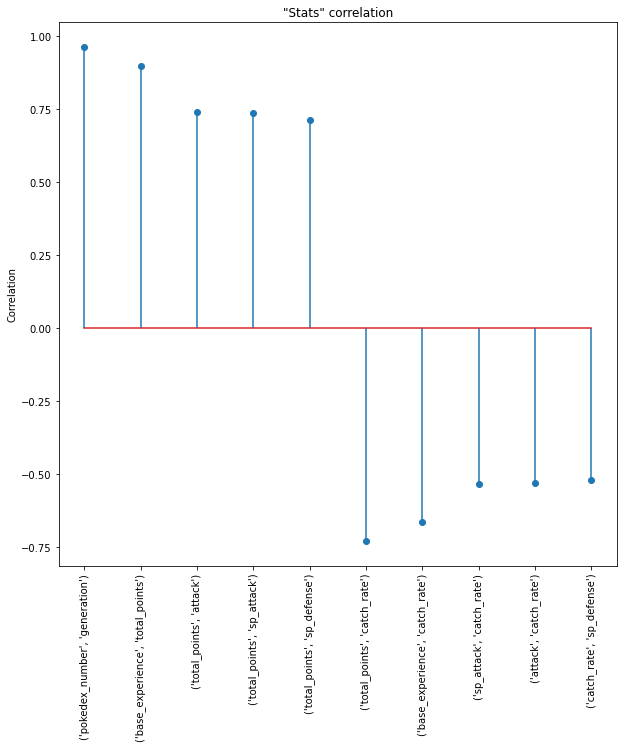

In [97]:
plt.figure(figsize = (10, 10))
plt.title('"Stats" correlation')
plt.stem(top_10_tot_corr_matrix, use_line_collection = True)
plt.ylabel('Correlation')

x = list(range(len(top_10_tot_corr_matrix)))
labels = []
for i in range(len(top_10_tot_corr_matrix)):
  labels.append(top_10_tot_corr_matrix.index[i])
  
plt.xticks(x, labels, rotation='vertical')
plt.show()

# Models

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# To compute the accuracy of my model
from sklearn.metrics import accuracy_score, classification_report

## What Type 1?

In [99]:
# I create a copy to work on
pokemon_type = pokemon_df[['type_1','against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']].copy()
pokemon_type['type_1'] = pd.Categorical(pokemon_type.type_1)
  
x = pokemon_type.filter(regex='against')
# Or I could have done
# x = pokemon_df.drop(['type_1'], axis = 1)
y = pokemon_type.type_1

# Splittingin train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state = 42)
model = RandomForestClassifier(random_state= 42)
# Fitting
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.8949416342412452
Classification report:                precision    recall  f1-score   support

         Bug       0.94      0.94      0.94        36
        Dark       0.95      0.87      0.91        23
      Dragon       0.91      0.84      0.87        25
    Electric       0.95      1.00      0.98        21
       Fairy       0.77      1.00      0.87        10
    Fighting       0.94      0.73      0.82        22
        Fire       0.92      0.94      0.93        36
      Flying       1.00      0.25      0.40         4
       Ghost       0.68      0.94      0.79        16
       Grass       0.94      1.00      0.97        44
      Ground       0.80      0.60      0.69        20
         Ice       0.88      0.88      0.88        16
      Normal       1.00      0.97      0.98        62
      Poison       1.00      0.75      0.86        20
     Psychic       0.87      0.87      0.87        39
        Rock       0.81      0.86      0.83        29
       Steel       0.56    

In [100]:
from sklearn.tree import DecisionTreeClassifier

x = pokemon_type.filter(regex='against')
y = pokemon_type.type_1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state = 42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8735408560311284


### Water

In [101]:
# I create a copy to work on
pokemon_water = pokemon_df.copy()

In [102]:
# To get all type_1 possible
types = pokemon_water.type_1.unique()

# I use a dictionary to replace
# To make it easier I only consider 2 cases: water or not water (so I can use a binary value)
replace_dict = {}
for i in range(len(types)):
  if types[i] == 'Water':
    replace_dict[types[i]] = 1
  else:
    replace_dict[types[i]] = 0
pokemon_water.type_1.replace(replace_dict, inplace = True)

In [103]:
pokemon_water.type_1.unique()

array([0, 1])

In [104]:
corr = pokemon_water.corrwith(pokemon_water['type_1'])
# I ignore the self correlation
corr_mask = corr[corr < 1]
max_corr = corr_mask.idxmax()
max_corr

'against_grass'

In [105]:
# Search for a correlation between a Pokemon type 1 and the column with the highest correlation
x = pokemon_water[max_corr]
y = pokemon_water.type_1

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state = 22)
model = RandomForestClassifier(random_state= 42)
model.fit(x_train.to_numpy().reshape(-1, 1), y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_pred = model.predict(x_test.to_numpy().reshape(-1, 1))
print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.9124513618677043


### For loop
I generalize what I did for the Watre type 1 and apply it to all types with a for loop

In [108]:
# To get all type_1 possible
types = pokemon_df.type_1.unique()

for i in range(len(types)):
  # I create a copy to work on
  pokemon_type = pokemon_df.copy()
  type_selected = types[i]
  # I use a dictionary to replace
  replace_dict = {}
  # To make it easier I only consider 2 cases: type selected or not (so I can use a binary value)
  for j in range(len(types)):
    if types[j] == type_selected:
      replace_dict[types[j]] = 1
    else:
      replace_dict[types[j]] = 0
  pokemon_type.type_1.replace(replace_dict, inplace = True)

  # I search for the correlation of the column type_1 with the others column
  correlation = pokemon_type.corrwith(pokemon_type['type_1'])
  # I ignore the self correlation (= 1) with a mask
  corr_mask = correlation[correlation < 0.9]
  # To find the index of the column of the value with the highest correlation
  max_corr = corr_mask.idxmax()
  
  # My x is the column with the highest correlation with the selected type
  x = pokemon_type[max_corr]
  # My y is the selected type
  y = pokemon_type.type_1

  # Splittingin train and test
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 22)
  model = RandomForestClassifier(random_state= 42)
  # Fitting
  model.fit(x_train.to_numpy().reshape(-1, 1), y_train)
  y_pred = model.predict(x_test.to_numpy().reshape(-1, 1))
  
  print('Prediction on type 1', type_selected, ', based on the column', max_corr)
  print('Accuracy: ', accuracy_score(y_pred, y_test))
  #print(classification_report(y_pred, y_test))

Prediction on type 1 Grass , based on the column against_poison
Accuracy:  0.9368932038834952
Prediction on type 1 Fire , based on the column against_water
Accuracy:  0.912621359223301
Prediction on type 1 Water , based on the column against_grass
Accuracy:  0.9271844660194175
Prediction on type 1 Bug , based on the column against_fire
Accuracy:  0.941747572815534
Prediction on type 1 Normal , based on the column against_fight
Accuracy:  0.8446601941747572
Prediction on type 1 Dark , based on the column against_fairy
Accuracy:  0.9514563106796117
Prediction on type 1 Poison , based on the column against_psychic
Accuracy:  0.970873786407767
Prediction on type 1 Electric , based on the column against_ground
Accuracy:  0.9466019417475728
Prediction on type 1 Ground , based on the column against_water
Accuracy:  0.9757281553398058
Prediction on type 1 Ice , based on the column against_steel
Accuracy:  0.9757281553398058
Prediction on type 1 Fairy , based on the column against_steel
Accurac

## Legendary or not

In [109]:
# I create a new df to work on
pokemon_legendary = pokemon_df[['status', 'total_points']].copy()

In [110]:
# Search for a correlation between a Pokemon status and its total points
x = pokemon_df.total_points
y = pokemon_legendary.status

In [111]:
pokemon_legendary.status
# It's made up of categorcal values -> I want numerical ones

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
            ...      
1022    Sub Legendary
1023    Sub Legendary
1024        Legendary
1025        Legendary
1026        Legendary
Name: status, Length: 1027, dtype: object

In [112]:
# I use a dictionary to replace
# To make it easier I only consider 2 cases: normal or special (so I can use a binary value)
replace_dict = {
    'Normal': 0,
    'Sub Legendary': 1,
    'Legendary' : 1,
    'Mythical': 1     
}
pokemon_legendary.status.replace(replace_dict, inplace = True)

In [113]:
pokemon_legendary.status

0       0
1       0
2       0
3       0
4       0
       ..
1022    1
1023    1
1024    1
1025    1
1026    1
Name: status, Length: 1027, dtype: int64

In [114]:
# I check if it worked in the whole dataframe
pokemon_legendary.status.unique()

array([0, 1])

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 22)
model = RandomForestClassifier(random_state= 42)
model.fit(x_train.to_numpy().reshape(-1, 1), y_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred = model.predict(x_test.to_numpy().reshape(-1, 1))
print('Accuracy: ', accuracy_score(y_pred, y_test))
#print(classification_report(y_pred, y_test))

Accuracy:  0.9563106796116505


In [117]:
pokemon_legendary['status'].corr(pokemon_legendary['total_points']) 

0.5278778059872833